In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

In [2]:
#  LOAD DATA
df = pd.read_csv('ObesityDataSet.csv')

In [3]:
# 1. TAMPILKAN BEBERAPA BARIS PERTAMA DAN INFORMASI UMUM DATASET
print("="*50)
print("1. EXPLORATORY DATA ANALYSIS (EDA)")
print("="*50)

1. EXPLORATORY DATA ANALYSIS (EDA)


In [4]:
# Menampilkan 5 baris pertama
print("\nDATA PREVIEW (5 BARIS PERTAMA):")
print(df.head())


DATA PREVIEW (5 BARIS PERTAMA):
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        

In [5]:
# Informasi umum dataset
print("\nINFORMASI UMUM DATASET:")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"Nama kolom: {', '.join(df.columns)}")


INFORMASI UMUM DATASET:
Jumlah baris: 2111
Jumlah kolom: 17
Nama kolom: Age, Gender, Height, Weight, CALC, FAVC, FCVC, NCP, SCC, SMOKE, CH2O, family_history_with_overweight, FAF, TUE, CAEC, MTRANS, NObeyesdad


In [6]:
# Tipe data
df = df.replace('?', np.nan)
kolom_numerik = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for kol in kolom_numerik:
    df[kol] = pd.to_numeric(df[kol], errors='coerce')
print("\nTIPE DATA:")
print(df.dtypes)


TIPE DATA:
Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [7]:
# Deskripsi Data
print("\nDESKRIPSI DATA :")
print(df.describe(include='all'))


DESKRIPSI DATA :
                Age Gender       Height       Weight       CALC  FAVC  \
count   2089.000000   2089  2089.000000  2092.000000       2091  2089   
unique          NaN      2          NaN          NaN          4     2   
top             NaN   Male          NaN          NaN  Sometimes   yes   
freq            NaN   1056          NaN          NaN       1386  1844   
mean      24.717928    NaN     1.706623    88.608184        NaN   NaN   
std        8.391323    NaN     0.117700    36.154617        NaN   NaN   
min       14.000000    NaN     1.450000    39.000000        NaN   NaN   
25%       19.955257    NaN     1.630000    66.000000        NaN   NaN   
50%       22.814657    NaN     1.701284    83.000000        NaN   NaN   
75%       26.000000    NaN     1.770000   108.055736        NaN   NaN   
max      106.441252    NaN     2.853986   441.131078        NaN   NaN   

               FCVC          NCP   SCC SMOKE         CH2O  \
count   2093.000000  2089.000000  2093  2098

In [8]:
# VISUALISASI DATA
print("="*50)
print("VISUALISASI DATA")
print("="*50)

VISUALISASI DATA


In [9]:
# Pengaturan untuk tampilan grafik
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)


Visualisai KOLOM NUMERIK


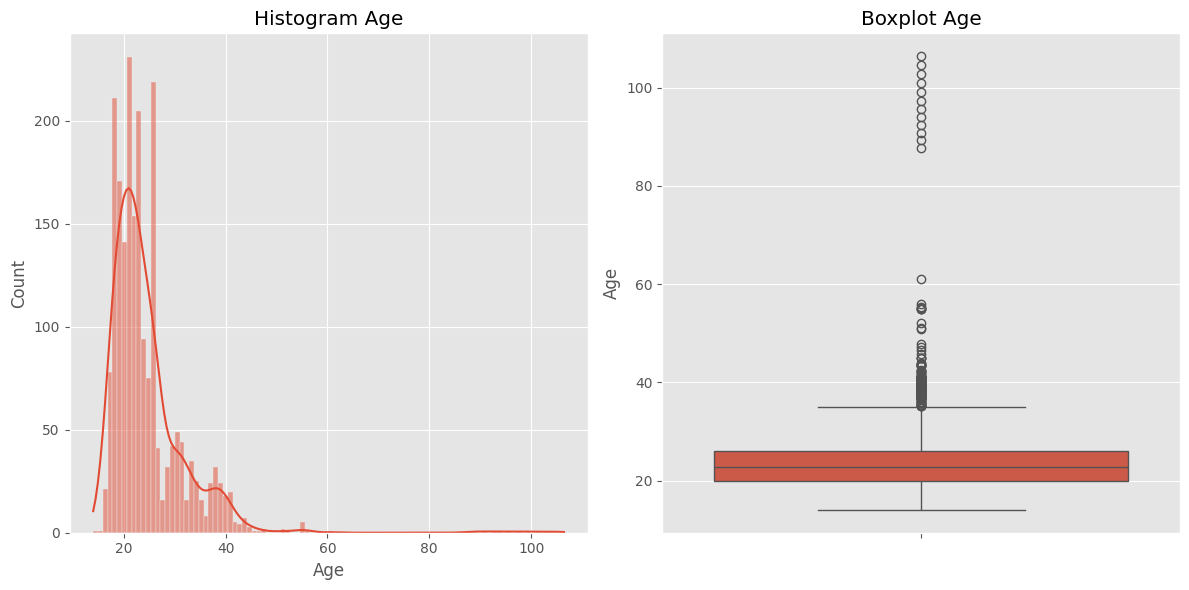

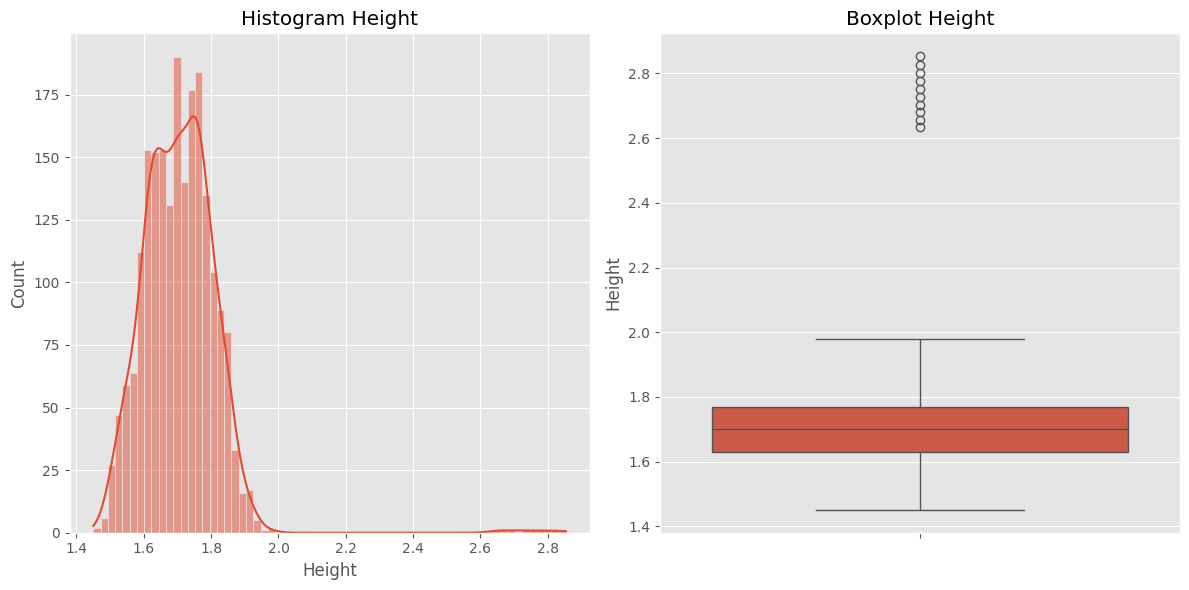

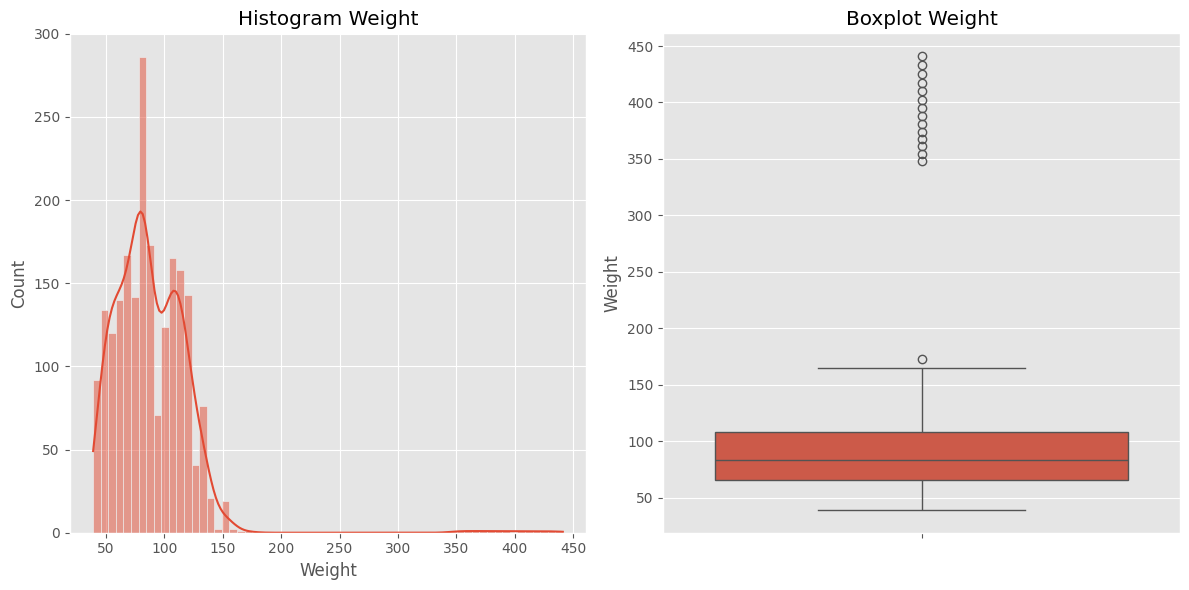

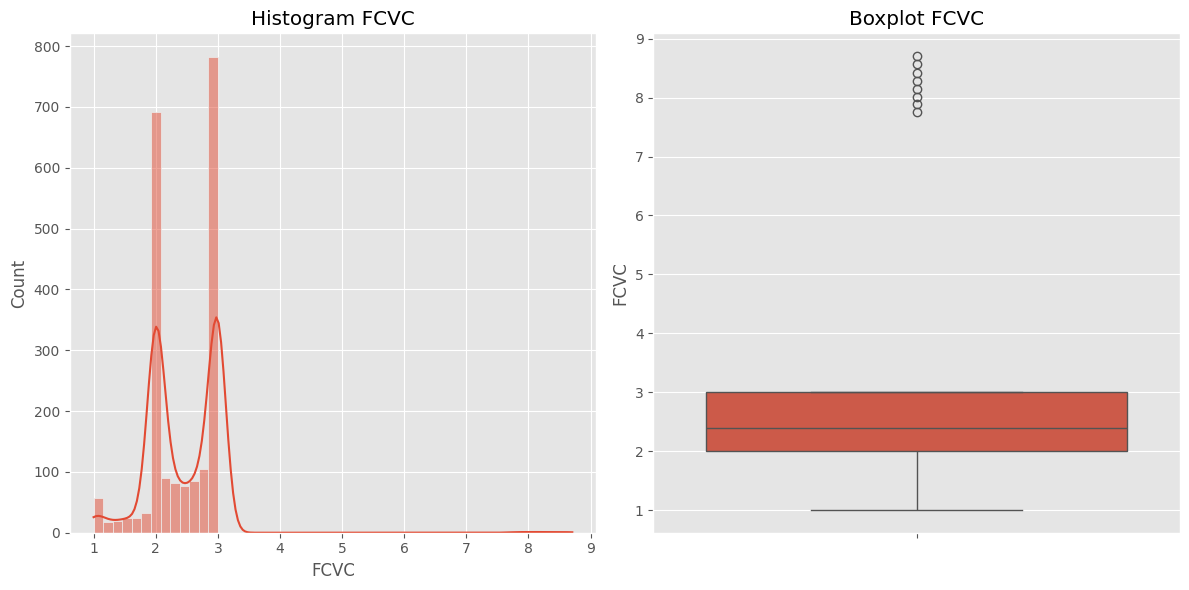

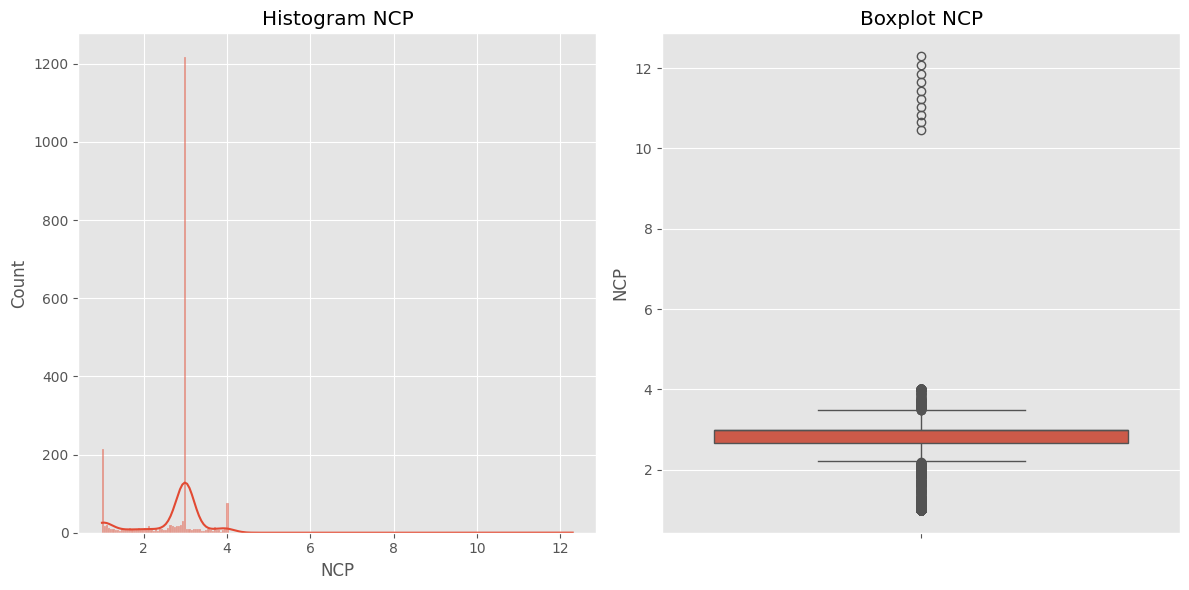

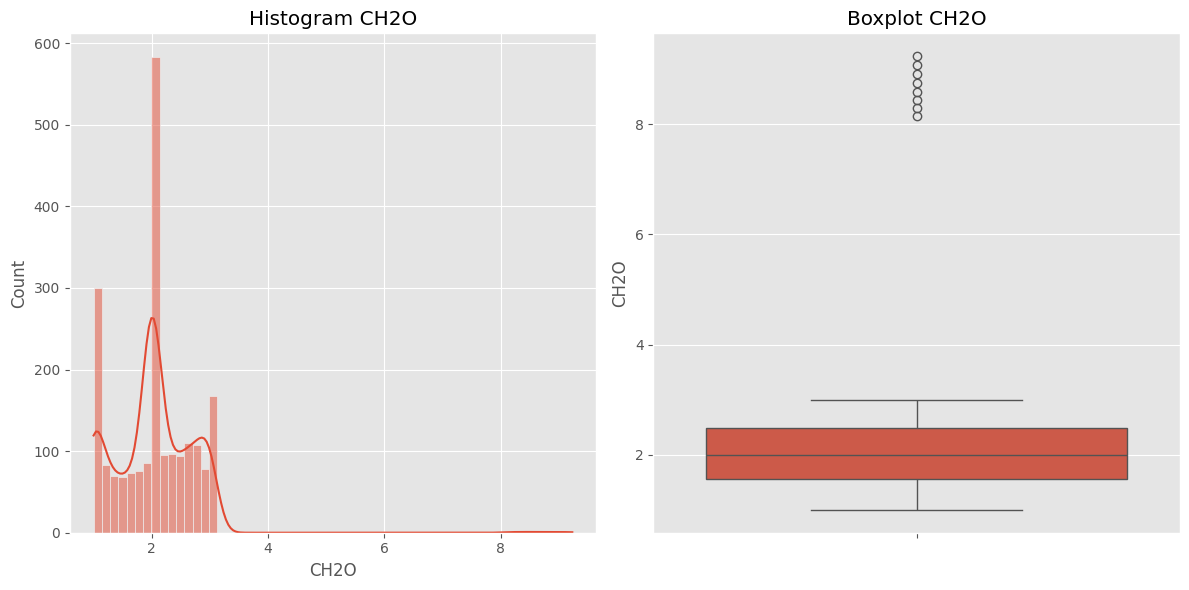

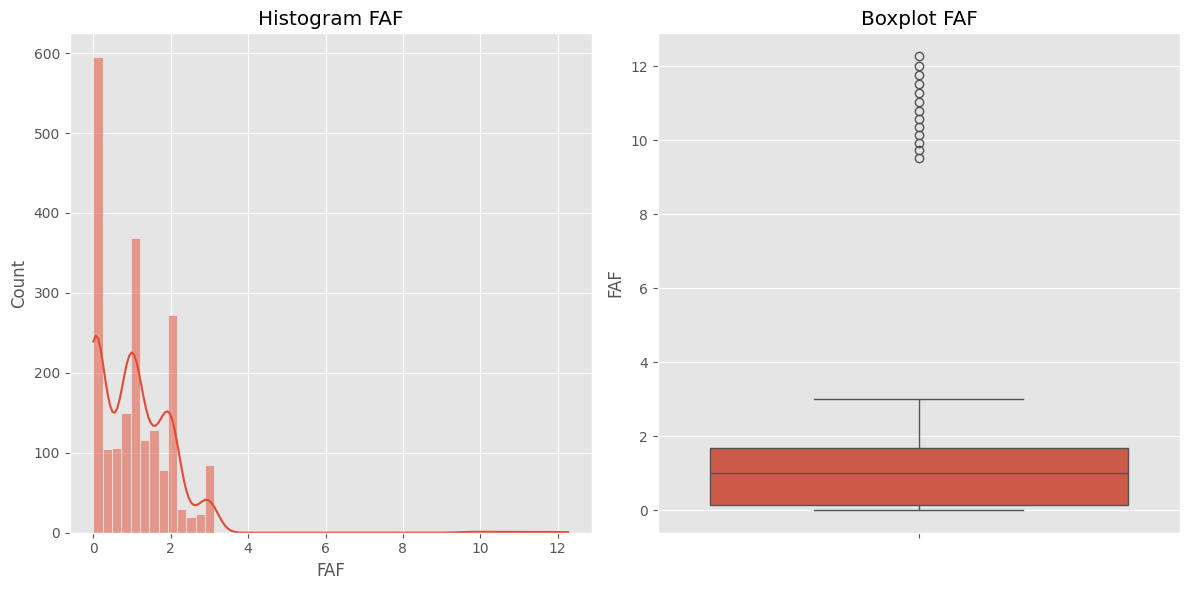

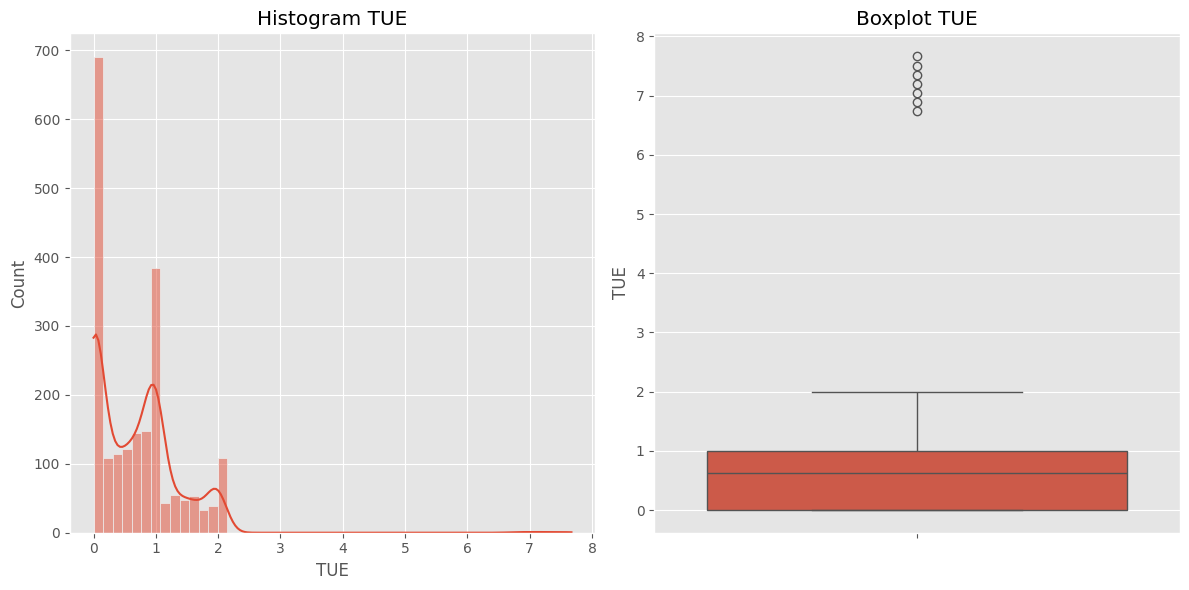

In [10]:
# Visualisasi kolom numerik
print("\nVisualisai KOLOM NUMERIK")
for i, col in enumerate(kolom_numerik):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot {col}')
    
    plt.tight_layout()
    file_path = os.path.join('Assets/visualisasi_data/kolom_numerik', f'distribusi_{col}.png')

    plt.savefig(file_path)
    plt.show()


Visualisai KOLOM CATEGORICAL


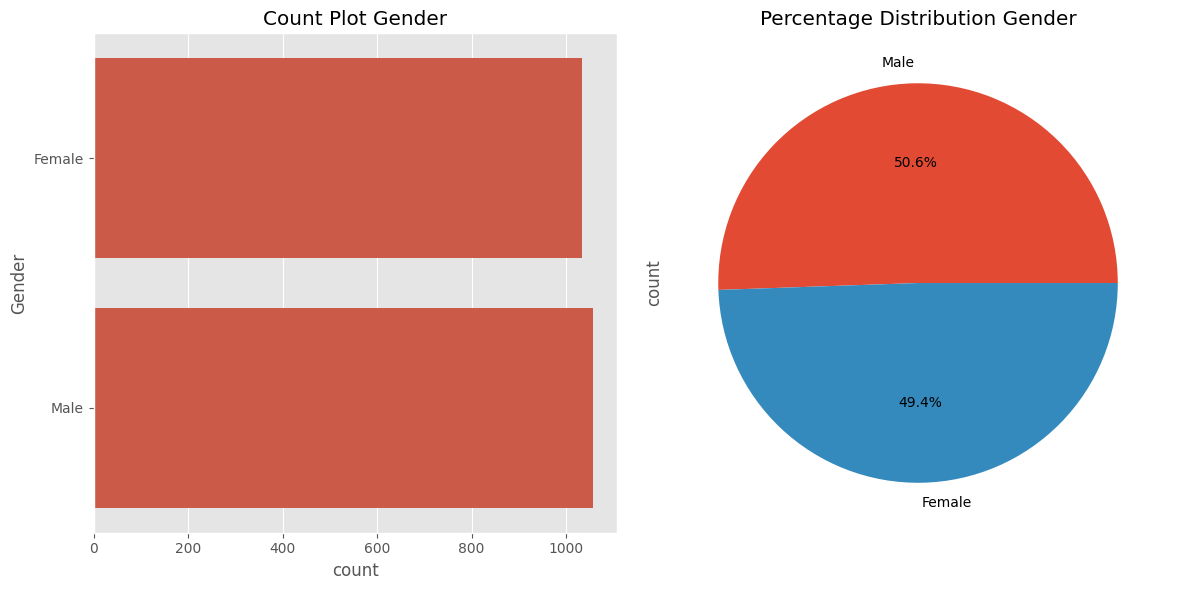

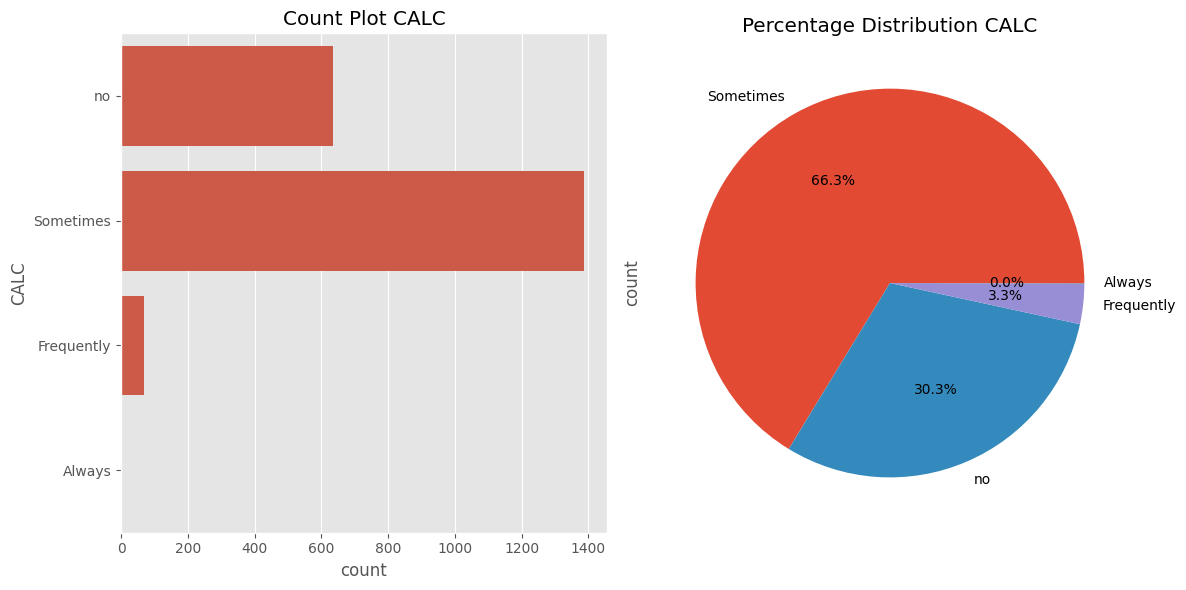

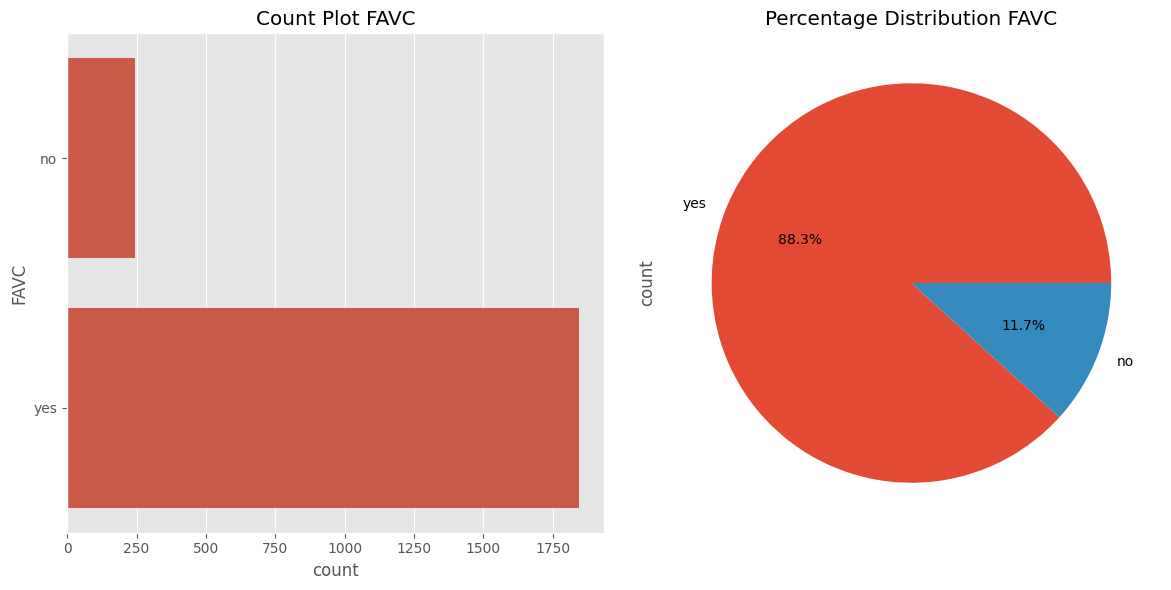

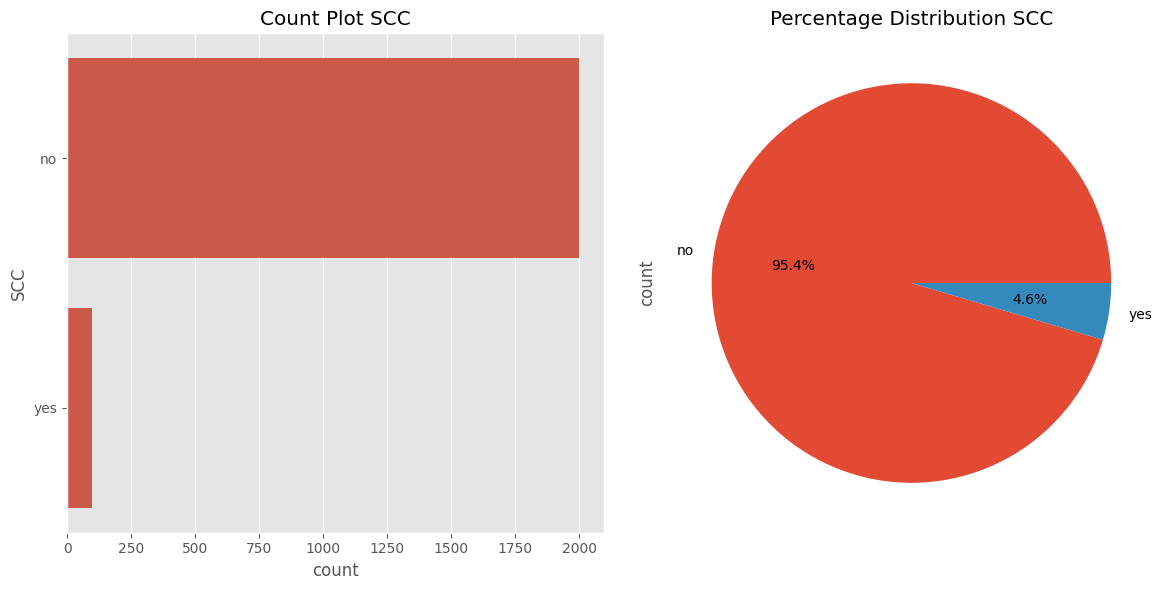

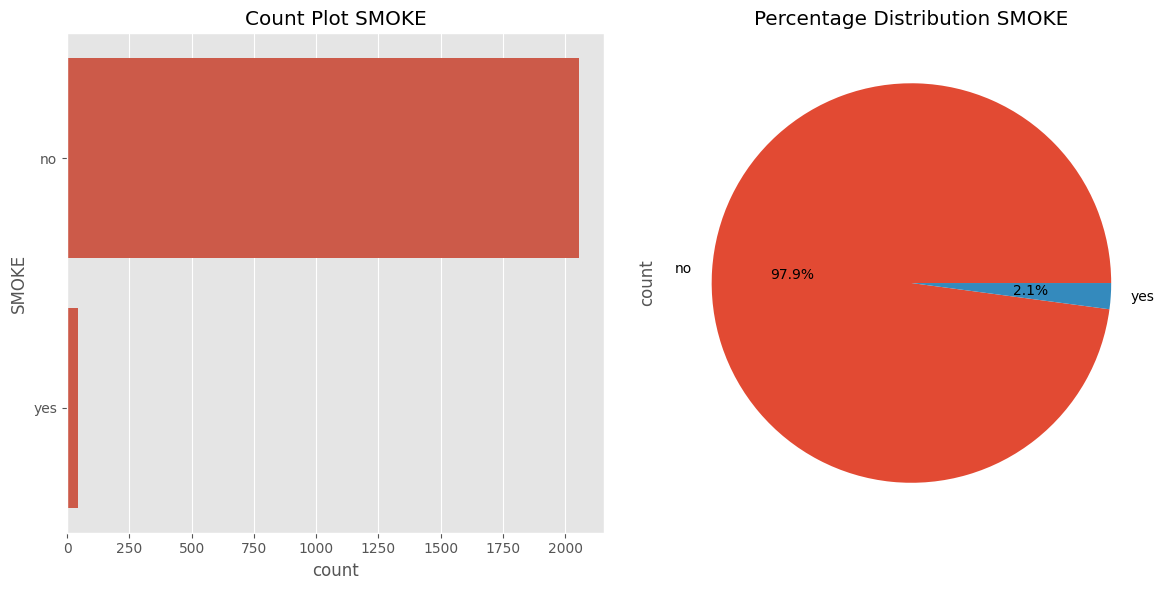

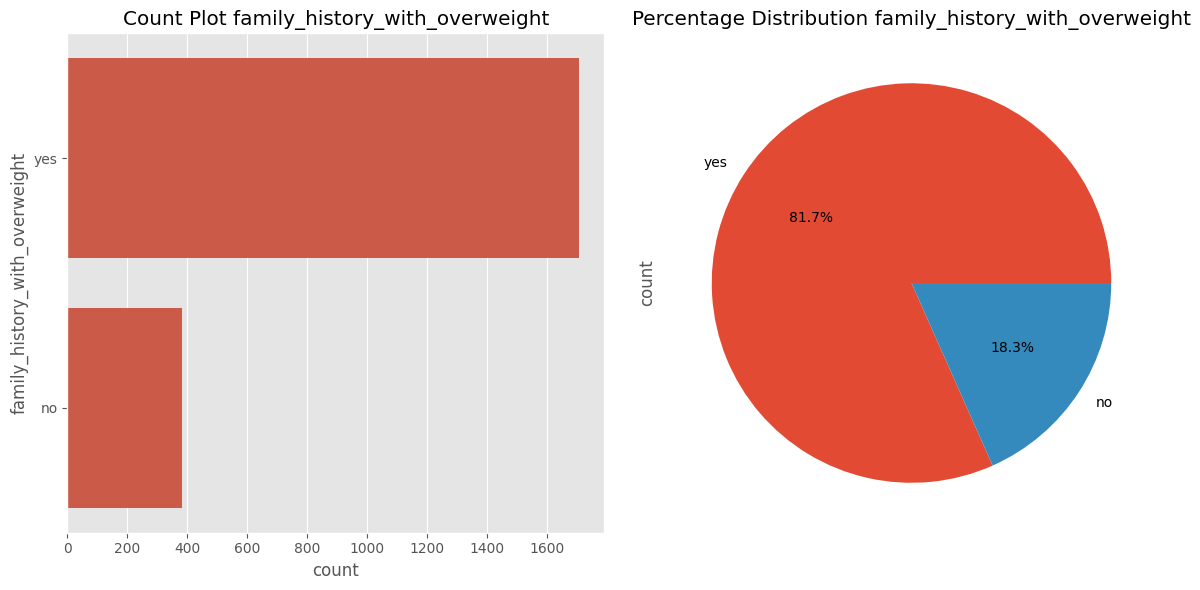

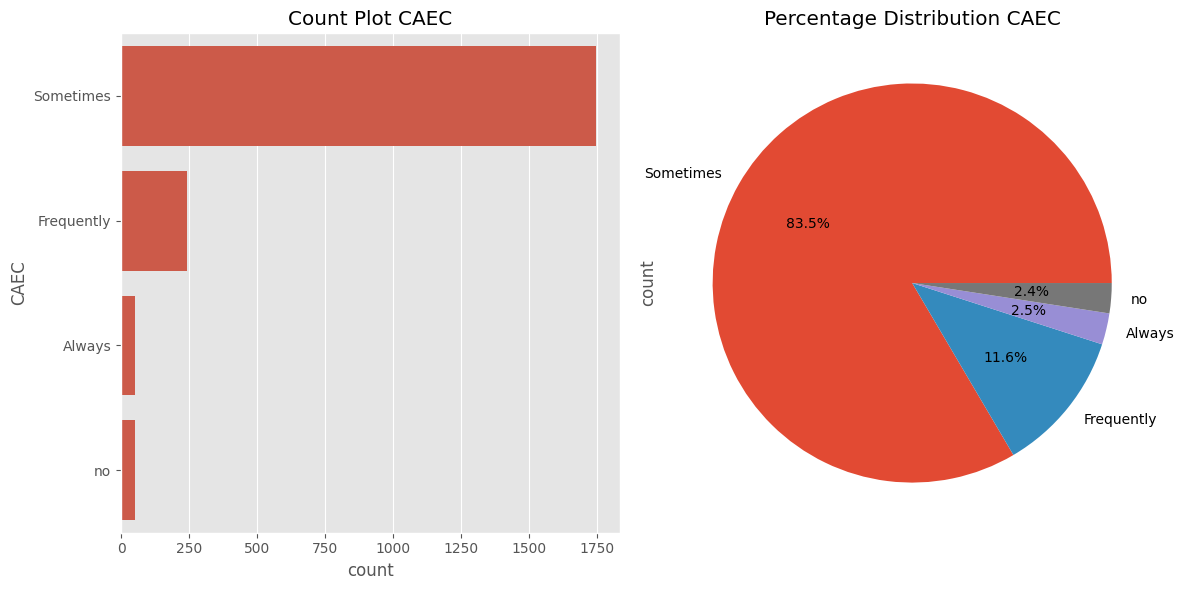

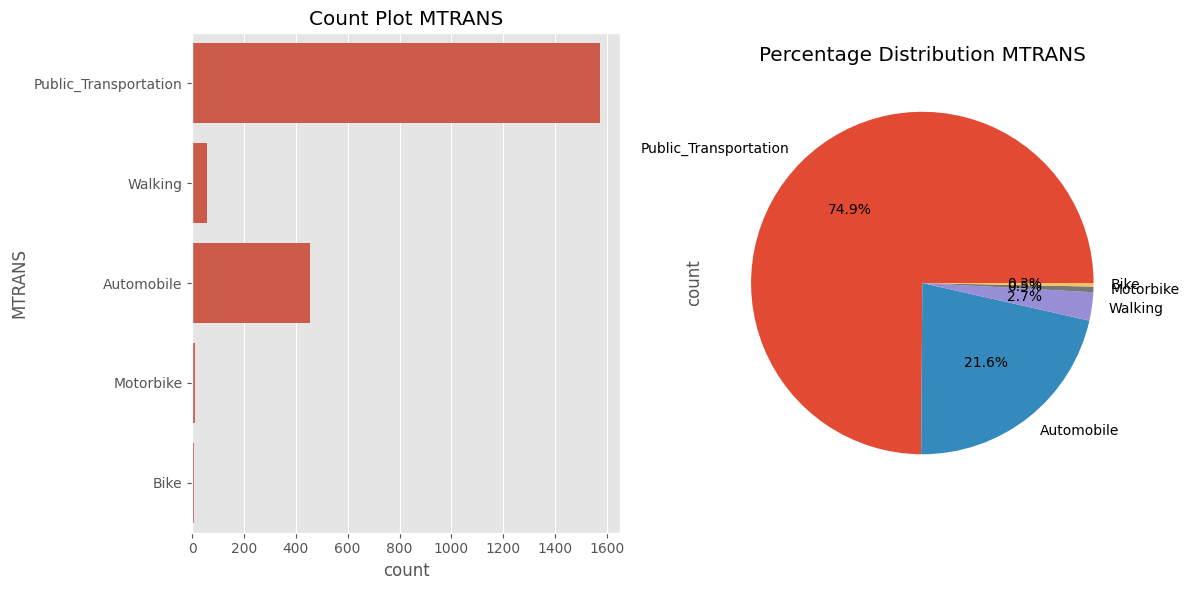

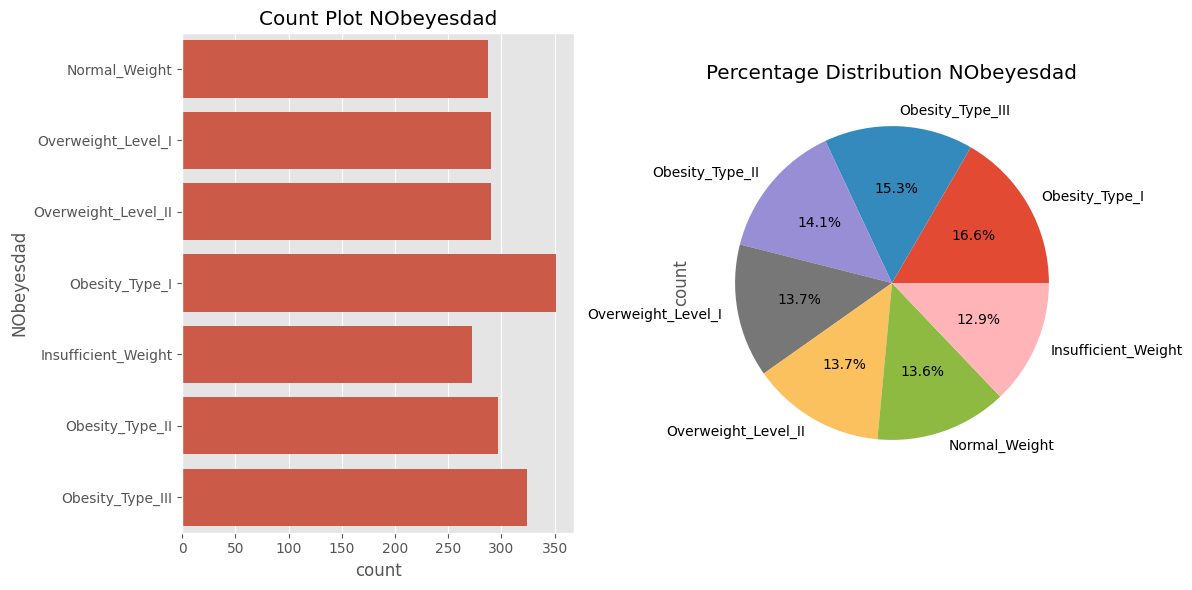

In [11]:
# Visualisasi kolom categorical
print("\nVisualisai KOLOM CATEGORICAL")
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(12, 6))
    
    # Count plot for categorical data
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, y=col)
    plt.title(f'Count Plot {col}')
    
    # Pie chart for percentage distribution
    plt.subplot(1, 2, 2)
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Percentage Distribution {col}')
    
    plt.tight_layout()
    file_path = os.path.join('Assets/visualisasi_data/kolom_categorical', f'distribusi_{col}.png')
    
    plt.savefig(file_path)
    plt.show()

In [12]:
#  CEK MISSING VALUES, UNIQUE VALUES, DATA DUPLIKAT, DAN OUTLIERS
print("="*50)
print("CEK KUALITAS DATA")
print("="*50)

CEK KUALITAS DATA


In [13]:
# 4.1 Missing Values
print("\nMISSING VALUES:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values,
                             'Percentage (%)': missing_percent})
print(missing_data[missing_data['Missing Values'] > 0])


MISSING VALUES:
                                Missing Values  Percentage (%)
Age                                         22        1.042160
Gender                                      22        1.042160
Height                                      22        1.042160
Weight                                      19        0.900047
CALC                                        20        0.947418
FAVC                                        22        1.042160
FCVC                                        18        0.852676
NCP                                         22        1.042160
SCC                                         18        0.852676
SMOKE                                       13        0.615822
CH2O                                        15        0.710564
family_history_with_overweight              23        1.089531
FAF                                         19        0.900047
TUE                                         15        0.710564
CAEC                                  

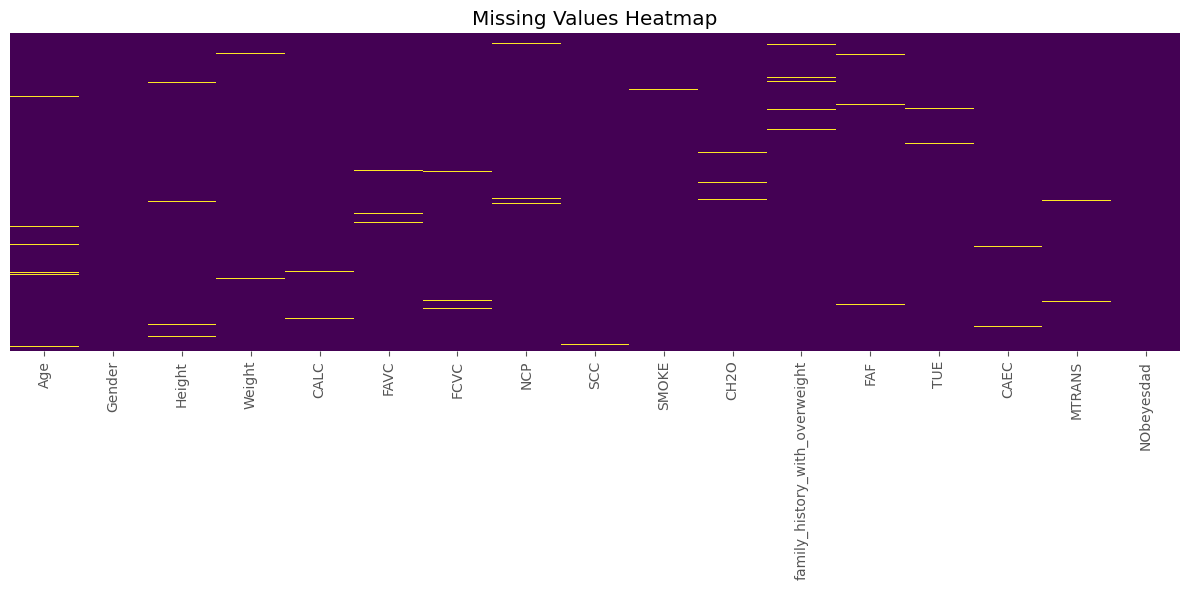

In [14]:
# Visualisasi missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.tight_layout()
file_path = os.path.join('Assets/missing_values', 'missing_values.png')
plt.savefig(file_path)
plt.show()

In [15]:
#  Unique Values
print("\nUNIQUE VALUES:")
unique_values = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes,
    'Unique Values': [df[col].nunique() for col in df.columns],
    'Unique Ratio (%)': [(df[col].nunique() / len(df)) * 100 for col in df.columns]
})
print(unique_values)


UNIQUE VALUES:
                                                        Column Data Type  \
Age                                                        Age   float64   
Gender                                                  Gender    object   
Height                                                  Height   float64   
Weight                                                  Weight   float64   
CALC                                                      CALC    object   
FAVC                                                      FAVC    object   
FCVC                                                      FCVC   float64   
NCP                                                        NCP   float64   
SCC                                                        SCC    object   
SMOKE                                                    SMOKE    object   
CH2O                                                      CH2O   float64   
family_history_with_overweight  family_history_with_overweight    object

In [16]:
# Data Duplikat
print("\nDATA DUPLIKAT:")
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates} ({(duplicates/len(df))*100:.2f}%)")


DATA DUPLIKAT:
Jumlah baris duplikat: 18 (0.85%)



KESEIMBANGAN DATA KATEGORIKAL:

Distribusi untuk Gender:
  Male: 1056 (50.02%)
  Female: 1033 (48.93%)


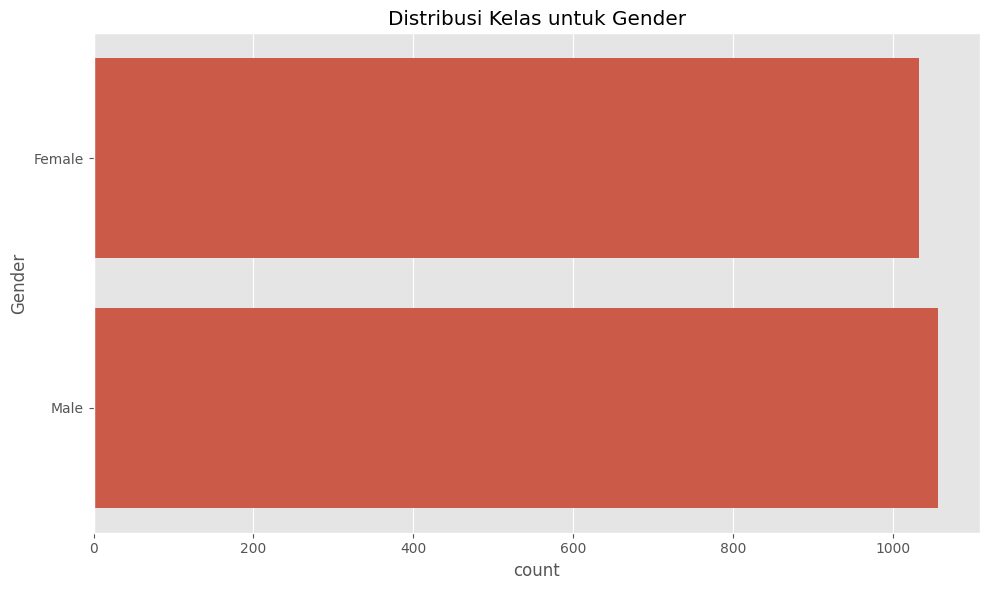


Distribusi untuk CALC:
  Sometimes: 1386 (65.66%)
  no: 634 (30.03%)
  Frequently: 70 (3.32%)
  Always: 1 (0.05%)


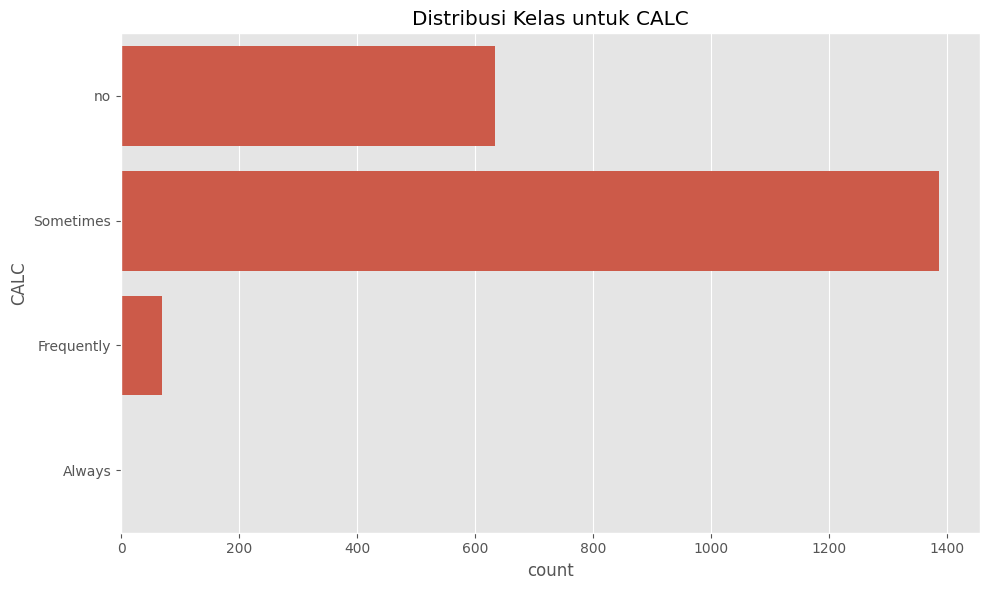


Distribusi untuk FAVC:
  yes: 1844 (87.35%)
  no: 245 (11.61%)


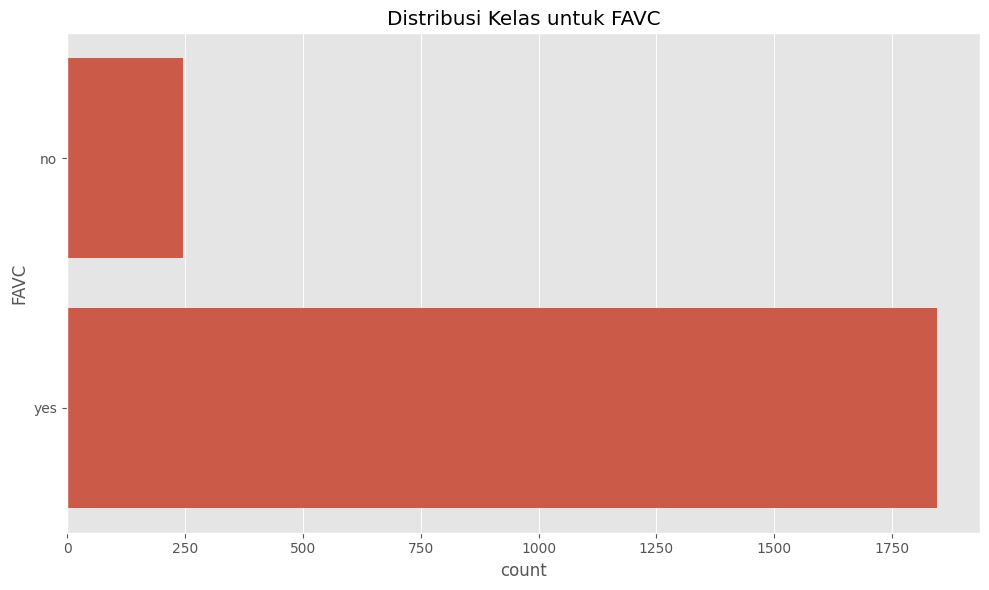


Distribusi untuk SCC:
  no: 1997 (94.60%)
  yes: 96 (4.55%)


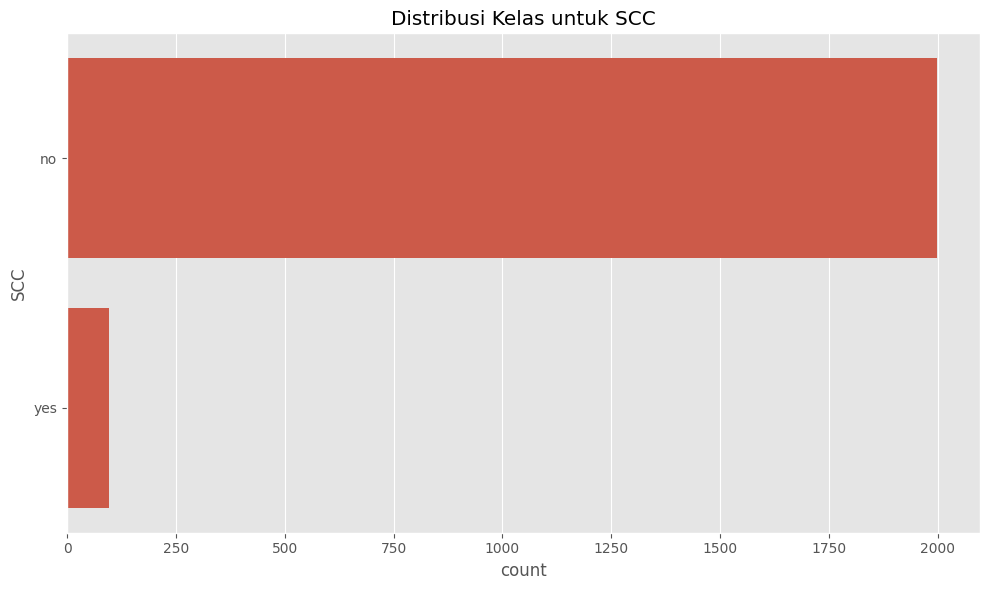


Distribusi untuk SMOKE:
  no: 2054 (97.30%)
  yes: 44 (2.08%)


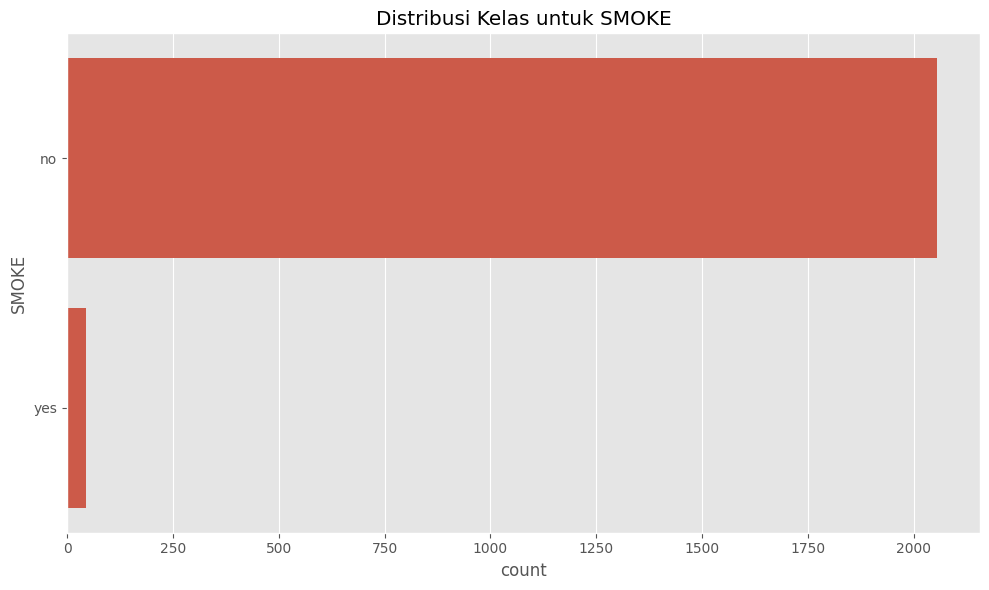


Distribusi untuk family_history_with_overweight:
  yes: 1705 (80.77%)
  no: 383 (18.14%)


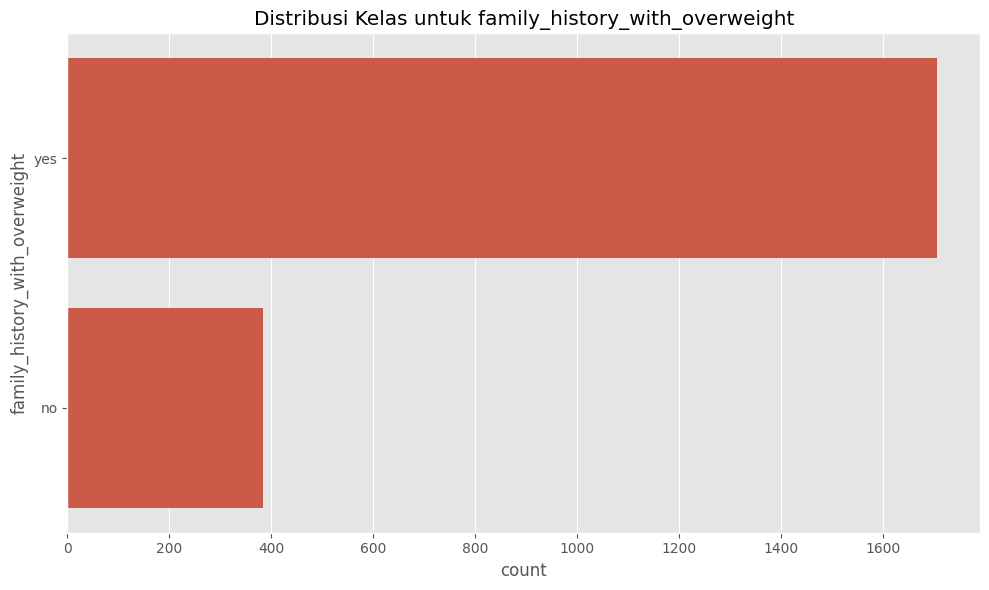


Distribusi untuk CAEC:
  Sometimes: 1747 (82.76%)
  Frequently: 242 (11.46%)
  Always: 53 (2.51%)
  no: 51 (2.42%)


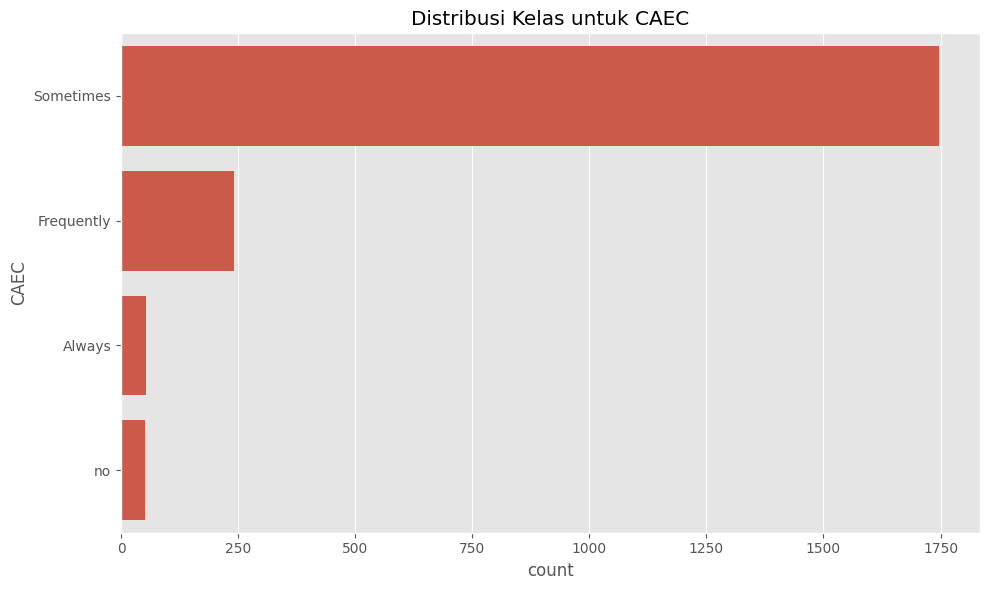


Distribusi untuk MTRANS:
  Public_Transportation: 1572 (74.47%)
  Automobile: 453 (21.46%)
  Walking: 56 (2.65%)
  Motorbike: 11 (0.52%)
  Bike: 7 (0.33%)


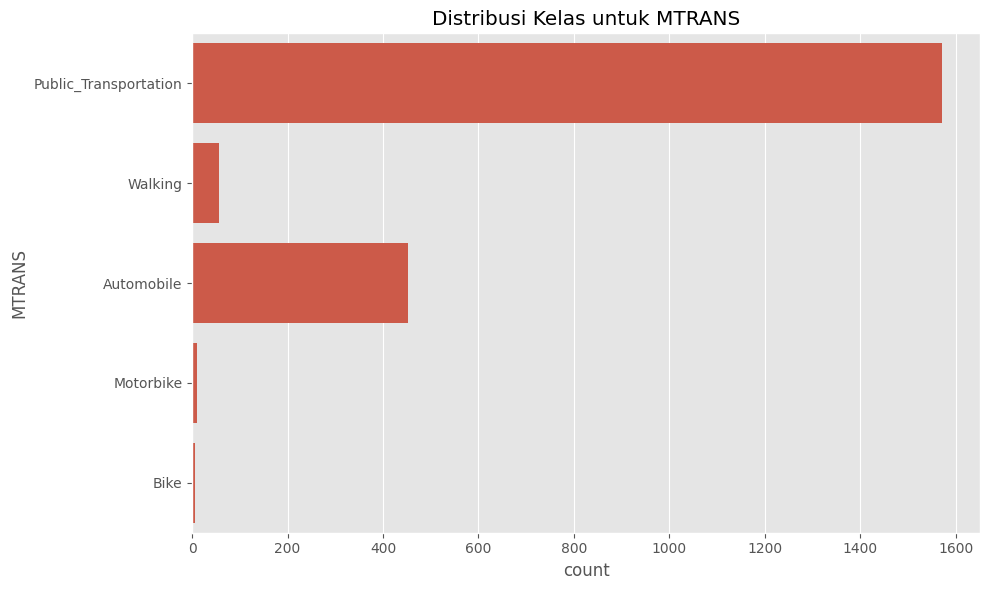


Distribusi untuk NObeyesdad:
  Obesity_Type_I: 351 (16.63%)
  Obesity_Type_III: 324 (15.35%)
  Obesity_Type_II: 297 (14.07%)
  Overweight_Level_I: 290 (13.74%)
  Overweight_Level_II: 290 (13.74%)
  Normal_Weight: 287 (13.60%)
  Insufficient_Weight: 272 (12.88%)


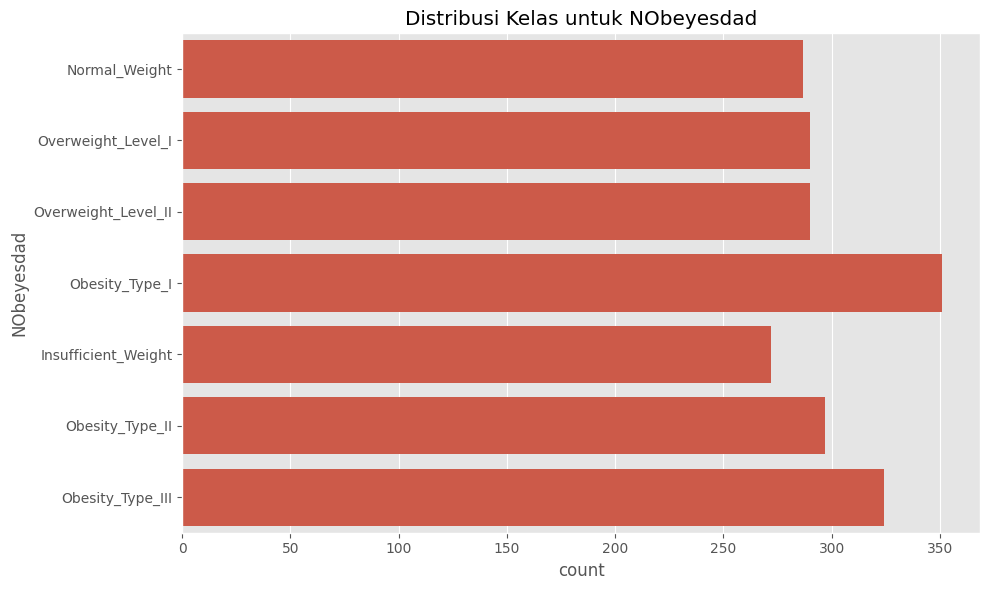

In [17]:
# Keseimbangan Data (untuk data kategorikal dan target )
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("\nKESEIMBANGAN DATA KATEGORIKAL:")
    for col in categorical_cols:
        if df[col].nunique() < 10:  # Hanya tampilkan jika jumlah kelas < 10
            class_counts = df[col].value_counts()
            class_percents = (class_counts / len(df)) * 100

            print(f"\nDistribusi untuk {col}:")
            for cls, count in class_counts.items():
                print(f"  {cls}: {count} ({class_percents[cls]:.2f}%)")

            # Visualisasi keseimbangan
            plt.figure(figsize=(10, 6))
            sns.countplot(y=df[col])
            plt.title(f'Distribusi Kelas untuk {col}')
            plt.tight_layout()
            file_path = os.path.join('Assets/class_balance/categorical', f'class_balance_{col}.png')
            plt.savefig(file_path)
            plt.show()

In [18]:
# DETEKSI OUTLIER
print("\nDETEKSI OUTLIER (MENGGUNAKAN METODE IQR):")


DETEKSI OUTLIER (MENGGUNAKAN METODE IQR):


In [19]:
# Ganti '?' dengan NaN
df = df.replace('?', np.nan)

In [20]:
# Inisialisasi dictionary untuk menyimpan informasi outlier
outlier_summary = {}

In [21]:
# Ringkasan outlier untuk kolom numerik dan kategorikal
# Untuk kolom numerik
for col in kolom_numerik:
    if df[col].isna().all():
        print(f"Kolom {col}: Tidak dapat menghitung outlier (semua data NaN)")
        continue
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_summary[col] = outlier_count

# Untuk kolom kategorikal
print("\nFrekuensi tidak umum pada kolom kategorikal:")
for col in df.select_dtypes(include=['object']).columns:
    value_counts = df[col].value_counts()
    total_count = len(df)
    rare_values = value_counts[value_counts/total_count < 0.01]  # kurang dari 1%
    
    if len(rare_values) > 0:
        print(f"\n{col}:")
        for value, count in rare_values.items():
            print(f"  {value}: {count} ({(count/total_count)*100:.2f}%)")
print("\nRingkasan Outlier:")
if all(count == 0 for count in outlier_summary.values()):
    print("  Tidak ada outlier yang ditemukan di semua kolom numerik.")
else:
    for col, count in outlier_summary.items():
        if count > 0:
            print(f"  {col}: {count} outlier ditemukan")


Frekuensi tidak umum pada kolom kategorikal:

CALC:
  Always: 1 (0.05%)

MTRANS:
  Motorbike: 11 (0.52%)
  Bike: 7 (0.33%)

Ringkasan Outlier:
  Age: 179 outlier ditemukan
  Height: 10 outlier ditemukan
  Weight: 15 outlier ditemukan
  FCVC: 8 outlier ditemukan
  NCP: 592 outlier ditemukan
  CH2O: 8 outlier ditemukan
  FAF: 13 outlier ditemukan
  TUE: 7 outlier ditemukan


In [22]:
# 5. KESIMPULAN
print("="*50)
print("KESIMPULAN EDA")
print("="*50)
print("\nBerikut kesimpulan dari proses EDA:")
print("1. Dataset memiliki {} baris dan {} kolom.".format(df.shape[0], df.shape[1]))

KESIMPULAN EDA

Berikut kesimpulan dari proses EDA:
1. Dataset memiliki 2111 baris dan 17 kolom.


In [23]:
# Missing values
if missing_values.sum() > 0:
    print("2. Terdapat {} missing values pada {} kolom.".format(
        missing_values.sum(), len(missing_data[missing_data['Missing Values'] > 0])))
else:
    print("2. Tidak terdapat missing values pada dataset.")

2. Terdapat 300 missing values pada 16 kolom.


In [24]:
# Duplicates
if duplicates > 0:
    print("3. Terdapat {} baris duplikat ({:.2f}%).".format(duplicates, (duplicates/len(df))*100))
else:
    print("3. Tidak terdapat data duplikat pada dataset.")

3. Terdapat 18 baris duplikat (0.85%).


In [25]:
# Outliers
# Initialize empty list for outlier count
outlier_count = []

# Check outliers in numeric columns using IQR method
for col in kolom_numerik:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]
    if len(outliers) > 0:
        outlier_count.append(col)

# Check rare values in categorical columns (values appearing less than 1% of the time)
for col in df.select_dtypes(include=['object']).columns:
    value_counts = df[col].value_counts()
    total_count = len(df)
    rare_values = value_counts[value_counts/total_count < 0.01]  # less than 1%
    if len(rare_values) > 0:
        outlier_count.append(col)
        
if len(outlier_count) > 0:
    print("4. Terdeteksi outlier pada kolom: {}.".format(", ".join(outlier_count)))
else:
    print("4. Tidak terdeteksi outlier pada dataset.")

4. Terdeteksi outlier pada kolom: Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE, CALC, MTRANS.


In [26]:
# 2. Tpreprocessing data
print("="*50)
print("2. PREPROCESSING DATA")
print("="*50)

2. PREPROCESSING DATA


In [27]:
# tangani missing values di setiap kolom
print("=== Missing Values ===")
print("Missing values sebelum imputasi:")
print(df.isnull().sum())

# Imputasi missing values untuk kolom numerik dengan median
for col in kolom_numerik:
    if df[col].isnull().any():
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

# Imputasi missing values untuk kolom kategorikal dengan modus
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().any():
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)

print("\nMissing values setelah imputasi:")
print(df.isnull().sum())

=== Missing Values ===
Missing values sebelum imputasi:
Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64

Missing values setelah imputasi:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP             

In [28]:
# Perbaikan ketidakkonsistensinan data untuk kolom numerik
print("=== Perbaikan Ketidakkonsistenan Data Numerik ===")

# Age harus berupa bilangan bulat
df['Age'] = df['Age'].round().astype(int)

# Height dan Weight harus positif dan dalam range yang masuk akal
df['Height'] = df['Height'].clip(lower=0, upper=300)  # dalam cm
df['Weight'] = df['Weight'].round().clip(lower=0, upper=500).astype(int)  # dalam kg

# FCVC (Frequency of consumption of vegetables) range 1-3
df['FCVC'] = df['FCVC'].clip(lower=1, upper=3)

# NCP (Number of main meals) range 1-4
df['NCP'] = df['NCP'].clip(lower=1, upper=4)

# CH2O (Consumption of water) range 1-3
df['CH2O'] = df['CH2O'].clip(lower=1, upper=3)

# FAF (Physical activity frequency) range 0-3
df['FAF'] = df['FAF'].clip(lower=0, upper=3)

# TUE (Time using technology devices) range 0-2
df['TUE'] = df['TUE'].clip(lower=0, upper=2)

print("\nRange nilai setelah perbaikan:")
print(df[kolom_numerik].head(25))

=== Perbaikan Ketidakkonsistenan Data Numerik ===

Range nilai setelah perbaikan:
    Age  Height  Weight  FCVC  NCP  CH2O  FAF      TUE
0    21    1.62      64   2.0  3.0   2.0  0.0  1.00000
1    21    1.52      56   3.0  3.0   3.0  3.0  0.00000
2    23    1.80      77   2.0  3.0   2.0  2.0  1.00000
3    27    1.80      87   3.0  3.0   2.0  2.0  0.00000
4    22    1.78      90   2.0  1.0   2.0  0.0  0.00000
5    29    1.62      53   2.0  3.0   2.0  0.0  0.00000
6    23    1.50      55   3.0  3.0   2.0  1.0  0.00000
7    22    1.64      53   2.0  3.0   2.0  3.0  0.00000
8    24    1.78     348   3.0  3.0   2.0  1.0  1.00000
9    22    1.72      68   2.0  3.0   2.0  1.0  1.00000
10   26    1.85     105   3.0  3.0   3.0  2.0  2.00000
11   21    1.72      80   2.0  3.0   2.0  2.0  1.00000
12   22    1.65      56   3.0  3.0   3.0  2.0  0.00000
13   41    1.80      99   2.0  3.0   2.0  2.0  1.00000
14   23    1.77      60   3.0  1.0   1.0  1.0  1.00000
15   22    1.70      66   3.0  3.0   2

In [29]:
# Perbaikan ketidakkonsistensinan data untuk kolom kategorikal
print("Memperbaiki konsistensi data kategorikal...")

# Mengubah semua nilai kategorikal menjadi lowercase
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].str.lower()

print("\nSample data setelah perbaikan:")
print(df[categorical_cols].head(10))

Memperbaiki konsistensi data kategorikal...

Sample data setelah perbaikan:
   Gender        CALC FAVC  SCC SMOKE family_history_with_overweight  \
0  female          no   no   no    no                            yes   
1  female   sometimes   no  yes   yes                            yes   
2    male  frequently   no   no    no                            yes   
3    male  frequently   no   no    no                             no   
4    male   sometimes   no   no    no                             no   
5    male   sometimes  yes   no    no                             no   
6  female   sometimes  yes   no    no                            yes   
7    male   sometimes   no   no    no                             no   
8    male  frequently  yes   no    no                            yes   
9    male          no  yes   no    no                            yes   

        CAEC                 MTRANS           NObeyesdad  
0  sometimes  public_transportation        normal_weight  
1  sometimes 

In [30]:
# Show number of duplicates before removal
print("Jumlah data duplikat sebelum penanganan:", df.duplicated().sum())

# Remove duplicate rows while keeping the first occurrence
df = df.drop_duplicates(keep='first')

# Show number of duplicates after removal
print("Jumlah data duplikat setelah penanganan:", df.duplicated().sum())

# Reset index after removing duplicates
df = df.reset_index(drop=True)

print("\nUkuran dataset setelah penanganan duplikasi:", df.shape)

Jumlah data duplikat sebelum penanganan: 21
Jumlah data duplikat setelah penanganan: 0

Ukuran dataset setelah penanganan duplikasi: (2090, 17)


In [31]:
print("Mengubah kolom kategorikal menjadi numerik...")
# Bikin salinan dataframe biar data asli gak rusak
df_encoded = df.copy()

# Encoding untuk kolom yang cuma punya 2 kategori (binary)
# Contoh: Gender (Male/Female), FAVC (yes/no), SMOKE (yes/no)
binary_cols = ['Gender', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']

for col in binary_cols:
    le = LabelEncoder()  # Bikin encoder baru untuk setiap kolom
    df_encoded[col] = le.fit_transform(df_encoded[col])
    # Hasil: Male→0, Female→1 atau yes→1, no→0

# One-hot encoding untuk kolom yang punya lebih dari 2 kategori
# Contoh: MTRANS (car, walking, bike, etc) jadi beberapa kolom terpisah
non_binary_cols = ['CALC', 'CAEC', 'MTRANS']
df_encoded = pd.get_dummies(df_encoded, columns=non_binary_cols, 
                           prefix=non_binary_cols, dtype=int)
# dtype=int biar hasilnya 0/1, bukan True/False

# Encode target variable (yang mau diprediksi) pake encoder terpisah
target_encoder = LabelEncoder()
df_encoded['NObeyesdad'] = target_encoder.fit_transform(df_encoded['NObeyesdad'])
# Hasil: tingkat obesitas jadi angka 0,1,2,3,dst

# Tampilkan hasil encoding
print("Shape setelah encoding:", df_encoded.shape)
print("\nBeberapa baris pertama data yang sudah di-encode:")
print(df_encoded.head())

# Cek tipe data untuk memastikan semuanya numerik
print("\nTipe data setelah encoding:")
print(df_encoded.dtypes)

# Lihat mapping target variable biar paham konversinya
print(f"\nMapping target variable:")
print(f"Nilai asli: {df['NObeyesdad'].unique()}")
print(f"Nilai setelah encode: {df_encoded['NObeyesdad'].unique()}")

Mengubah kolom kategorikal menjadi numerik...
Shape setelah encoding: (2090, 27)

Beberapa baris pertama data yang sudah di-encode:
   Age  Gender  Height  Weight  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  ...  \
0   21       0    1.62      64     0   2.0  3.0    0      0   2.0  ...   
1   21       0    1.52      56     0   3.0  3.0    1      1   3.0  ...   
2   23       1    1.80      77     0   2.0  3.0    0      0   2.0  ...   
3   27       1    1.80      87     0   3.0  3.0    0      0   2.0  ...   
4   22       1    1.78      90     0   2.0  1.0    0      0   2.0  ...   

   CALC_sometimes  CAEC_always  CAEC_frequently  CAEC_no  CAEC_sometimes  \
0               0            0                0        0               1   
1               1            0                0        0               1   
2               0            0                0        0               1   
3               0            0                0        0               1   
4               1            0             

In [32]:
# menampilkan kolom target setelah encoding
print("\nEncoded NObeyesdad values:")
print(df['NObeyesdad'].head(10))

print("\nEncoded NObeyesdad values:")
print(df_encoded['NObeyesdad'].head(10))




Encoded NObeyesdad values:
0          normal_weight
1          normal_weight
2          normal_weight
3     overweight_level_i
4    overweight_level_ii
5          normal_weight
6          normal_weight
7          normal_weight
8          normal_weight
9          normal_weight
Name: NObeyesdad, dtype: object

Encoded NObeyesdad values:
0    1
1    1
2    1
3    5
4    6
5    1
6    1
7    1
8    1
9    1
Name: NObeyesdad, dtype: int64



Menampilkan kolom yang paling berpengaruh terhadap kolom target
Weight                            0.304052
Height                            0.090904
FCVC                              0.090405
Age                               0.080077
NCP                               0.056683
Gender                            0.053513
TUE                               0.052357
CH2O                              0.049423
FAF                               0.045289
family_history_with_overweight    0.031525
CALC_sometimes                    0.023386
CAEC_sometimes                    0.017841
CALC_no                           0.017601
CAEC_frequently                   0.017470
FAVC                              0.017460
MTRANS_public_transportation      0.015048
MTRANS_automobile                 0.013644
SCC                               0.005440
CALC_frequently                   0.003959
MTRANS_walking                    0.003709
CAEC_always                       0.003475
SMOKE                           

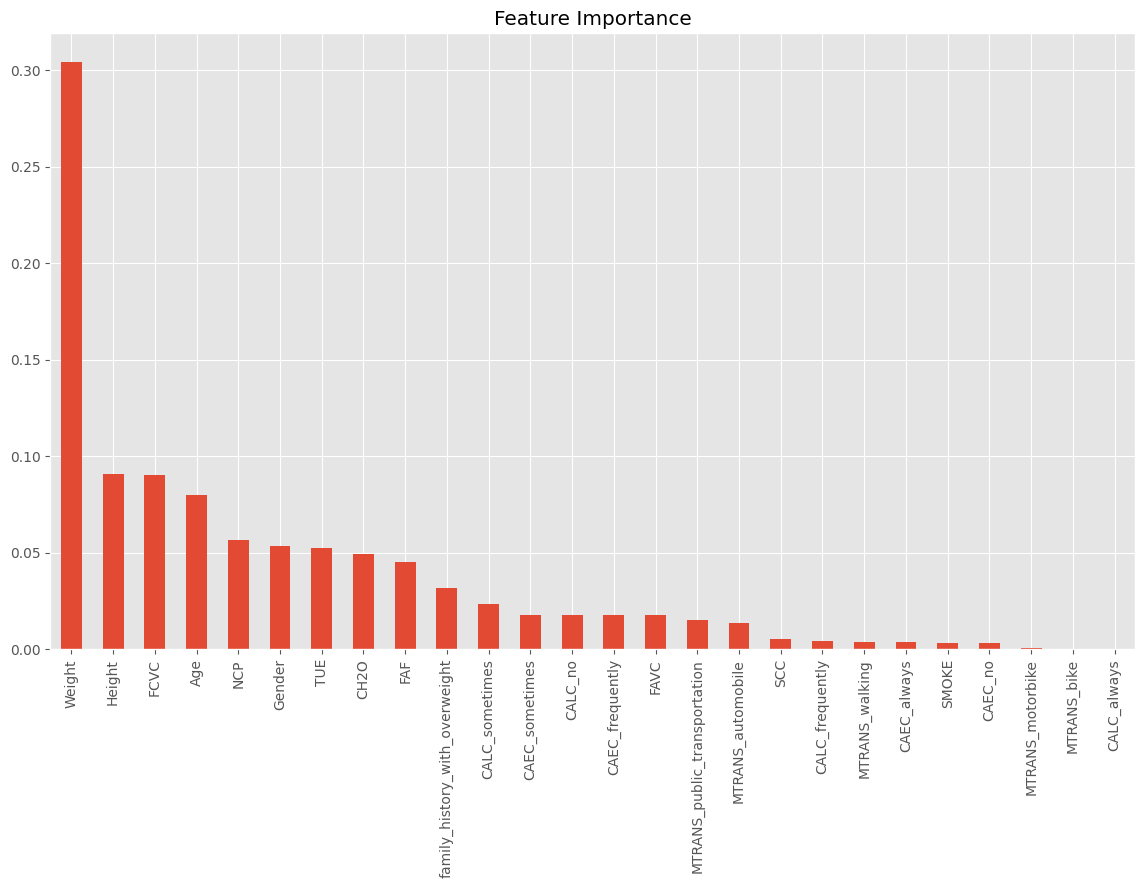

In [33]:
print("\nMenampilkan kolom yang paling berpengaruh terhadap kolom target")
X = df_encoded.drop('NObeyesdad', axis=1)  # Fitur
y = df['NObeyesdad']  # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Cek feature importance
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importance)

# Visualisasi
importance.plot(kind='bar', title='Feature Importance')
plt.show()

In [34]:
# pemilihan fitur menggunakan RFE (Recursive Feature Elimination)

# Get the top 10 features based on importance ranking
top_10_features = importance.nlargest(10).index.tolist()
print("Top 10 features:", top_10_features)

# Create a new RandomForestClassifier
selector = RandomForestClassifier(random_state=42)

# Create RFE with n_features_to_select=10
rfe = RFE(estimator=selector, n_features_to_select=10, step=1)

# Fit RFE
X_selected = rfe.fit_transform(X, y)

# Create new dataframe with selected features
X_selected_df = pd.DataFrame(X_selected, columns=np.array(X.columns)[rfe.support_])

print("\nSelected features:")
for i, feature in enumerate(X_selected_df.columns, 1):
    print(f"{i}. {feature}")


Top 10 features: ['Weight', 'Height', 'FCVC', 'Age', 'NCP', 'Gender', 'TUE', 'CH2O', 'FAF', 'family_history_with_overweight']

Selected features:
1. Age
2. Gender
3. Height
4. Weight
5. FCVC
6. NCP
7. CH2O
8. family_history_with_overweight
9. FAF
10. TUE


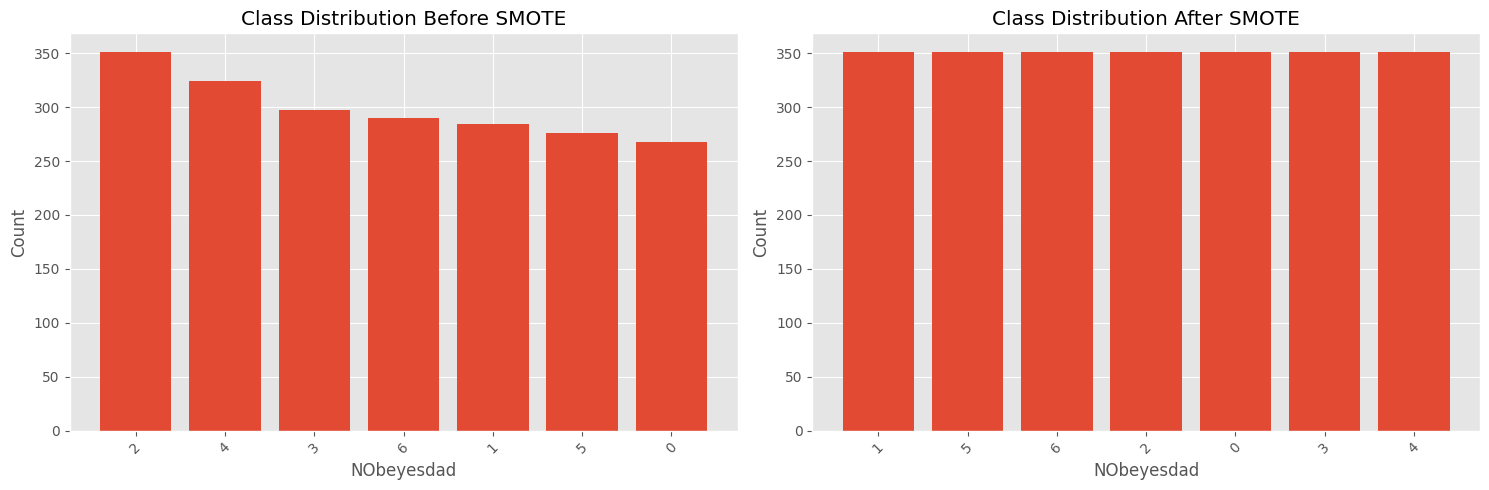


Class distribution before SMOTE:
NObeyesdad
2    351
4    324
3    297
6    290
1    284
5    276
0    268
Name: count, dtype: int64

Class distribution after SMOTE:
NObeyesdad
1    351
5    351
6    351
2    351
0    351
3    351
4    351
Name: count, dtype: int64


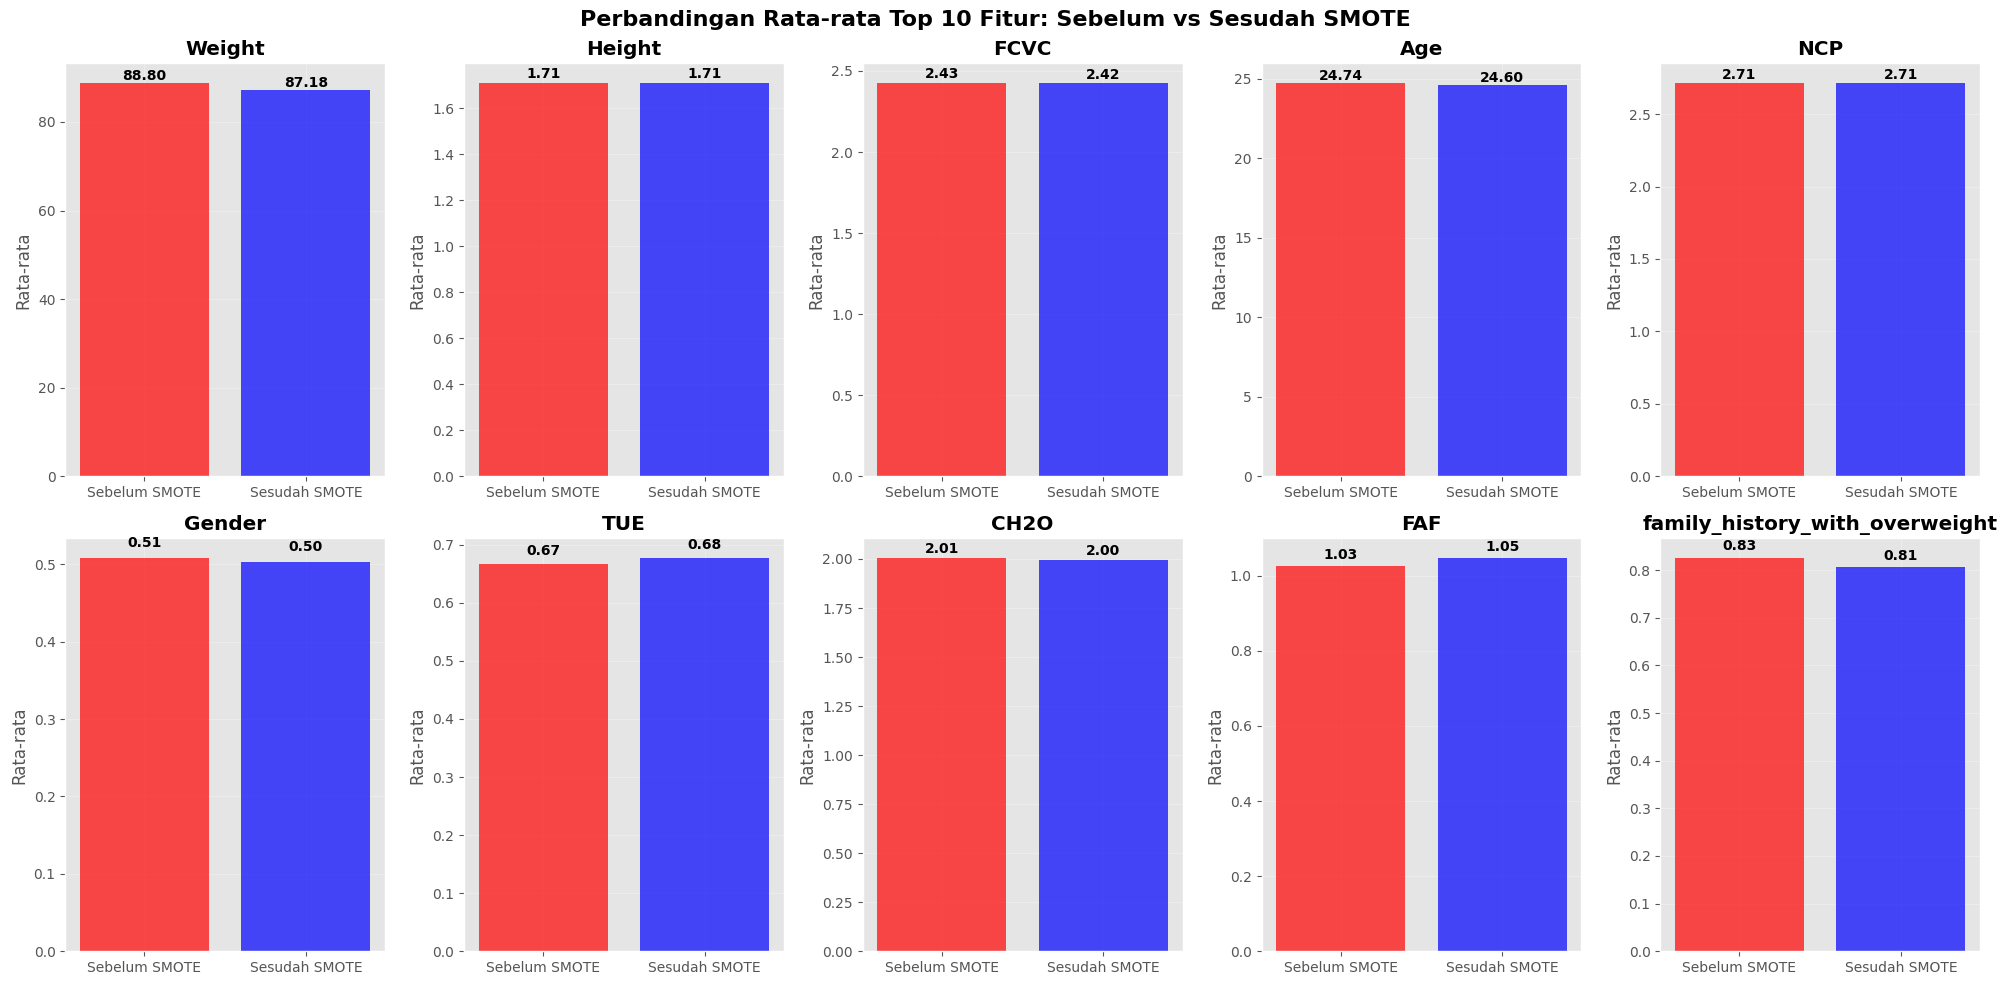


      Seperti yang terlihat, nilai rata-rata fitur seperti berat badan turun sedikit dari 88,80 menjadi 87,18 kg, 
      sementara tinggi badan dan jumlah makan utama tetap stabil. Perubahan ini sangat kecil, 
      menunjukkan SMOTE berhasil menyeimbangkan data tanpa mengubah karakteristik utama. 
      Ini penting untuk memastikan model machine learning kita bekerja lebih baik dengan data yang seimbang

PERBANDINGAN JUMLAH DATA:


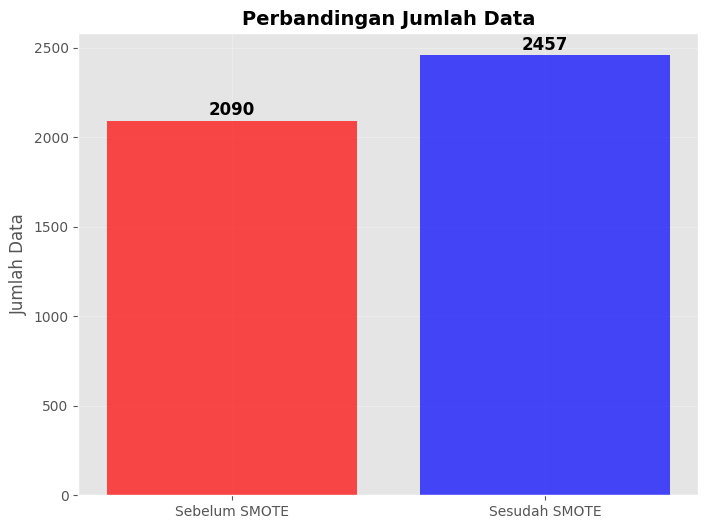


RINGKASAN BALANCING:
Data sebelum SMOTE: 2090 baris
Data sesudah SMOTE: 2457 baris
Penambahan data: 367 baris
Fitur yang digunakan: 10 fitur
Semua kelas target sekarang seimbang: 7 kelas dengan masing-masing 351 data


In [35]:
# Peneyimbangan data dengan SMOTE
selected_features = top_10_features + ['NObeyesdad']
X_selected = df_encoded[top_10_features]
y = df_encoded['NObeyesdad']

# Initialize and apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_selected, y)

# Create figure with two subplots
plt.figure(figsize=(15, 5))

# Plot before SMOTE
plt.subplot(1, 2, 1)
before_counts = y.value_counts()
plt.bar(range(len(before_counts)), before_counts.values)
plt.title('Class Distribution Before SMOTE')
plt.xticks(range(len(before_counts)), before_counts.index, rotation=45)
plt.xlabel('NObeyesdad')
plt.ylabel('Count')

# Plot after SMOTE
plt.subplot(1, 2, 2)
after_counts = pd.Series(y_balanced).value_counts()
plt.bar(range(len(after_counts)), after_counts.values)
plt.title('Class Distribution After SMOTE')
plt.xticks(range(len(after_counts)), after_counts.index, rotation=45)
plt.xlabel('NObeyesdad')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Print class distribution before and after SMOTE
print("\nClass distribution before SMOTE:")
print(pd.Series(y).value_counts())
print("\nClass distribution after SMOTE:")
print(pd.Series(y_balanced).value_counts())

# ===== VISUALISASI TOP 10 FITUR DENGAN BAR CHART =====

# Gabungkan fitur dan target untuk perbandingan
df_before = pd.DataFrame(X_selected, columns=top_10_features)
df_after = pd.DataFrame(X_balanced, columns=top_10_features)

# Buat statistik ringkasan untuk setiap fitur
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Perbandingan Rata-rata Top 10 Fitur: Sebelum vs Sesudah SMOTE', fontsize=16, fontweight='bold')

for i, feature in enumerate(top_10_features):
    row = i // 5
    col = i % 5
    
    # Hitung rata-rata sebelum dan sesudah SMOTE
    mean_before = df_before[feature].mean()
    mean_after = df_after[feature].mean()
    
    # Buat bar chart
    categories = ['Sebelum SMOTE', 'Sesudah SMOTE']
    values = [mean_before, mean_after]
    colors = ['red', 'blue']
    
    bars = axes[row, col].bar(categories, values, color=colors, alpha=0.7)
    axes[row, col].set_title(f'{feature}', fontweight='bold')
    axes[row, col].set_ylabel('Rata-rata')
    axes[row, col].grid(True, alpha=0.3)
    
    # Tambahkan nilai di atas bar
    for bar, value in zip(bars, values):
        axes[row, col].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                           f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print('''
      Seperti yang terlihat, nilai rata-rata fitur seperti berat badan turun sedikit dari 88,80 menjadi 87,18 kg, 
      sementara tinggi badan dan jumlah makan utama tetap stabil. Perubahan ini sangat kecil, 
      menunjukkan SMOTE berhasil menyeimbangkan data tanpa mengubah karakteristik utama. 
      Ini penting untuk memastikan model machine learning kita bekerja lebih baik dengan data yang seimbang''')

# Tampilkan perbandingan jumlah data
print("\nPERBANDINGAN JUMLAH DATA:")
print("=" * 40)

fig2, ax = plt.subplots(1, 1, figsize=(8, 6))
categories = ['Sebelum SMOTE', 'Sesudah SMOTE']  
values = [len(df_before), len(df_after)]
colors = ['red', 'blue']

bars = ax.bar(categories, values, color=colors, alpha=0.7)
ax.set_title('Perbandingan Jumlah Data', fontsize=14, fontweight='bold')
ax.set_ylabel('Jumlah Data')
ax.grid(True, alpha=0.3)

# Tambahkan nilai di atas bar
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
           f'{value}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.show()

# Tampilkan ringkasan sederhana
print(f"\nRINGKASAN BALANCING:")
print(f"Data sebelum SMOTE: {X_selected.shape[0]} baris")
print(f"Data sesudah SMOTE: {X_balanced.shape[0]} baris") 
print(f"Penambahan data: {X_balanced.shape[0] - X_selected.shape[0]} baris")
print(f"Fitur yang digunakan: {len(top_10_features)} fitur")
print(f"Semua kelas target sekarang seimbang: {len(set(y_balanced))} kelas dengan masing-masing {max(pd.Series(y_balanced).value_counts())} data")


Perbandingan statistik sebelum dan sesudah standarisasi:

Sebelum standarisasi:
            Weight       Height         FCVC          Age          NCP  \
count  2457.000000  2457.000000  2457.000000  2457.000000  2457.000000   
mean     87.175417     1.708985     2.422774    24.599105     2.714766   
std      35.274744     0.121298     0.528604     8.286898     0.766183   
min      39.000000     1.450000     1.000000    14.000000     1.000000   
25%      65.000000     1.632983     2.000000    20.000000     2.701689   
50%      82.000000     1.703202     2.397284    23.000000     3.000000   
75%     106.000000     1.768672     3.000000    26.000000     3.000000   
max     441.000000     2.853986     3.000000   106.000000     4.000000   

           Gender          TUE         CH2O          FAF  \
count  2457.00000  2457.000000  2457.000000  2457.000000   
mean      0.50346     0.677094     1.996306     1.046937   
std       0.50009     0.609445     0.601898     0.855421   
min       0.

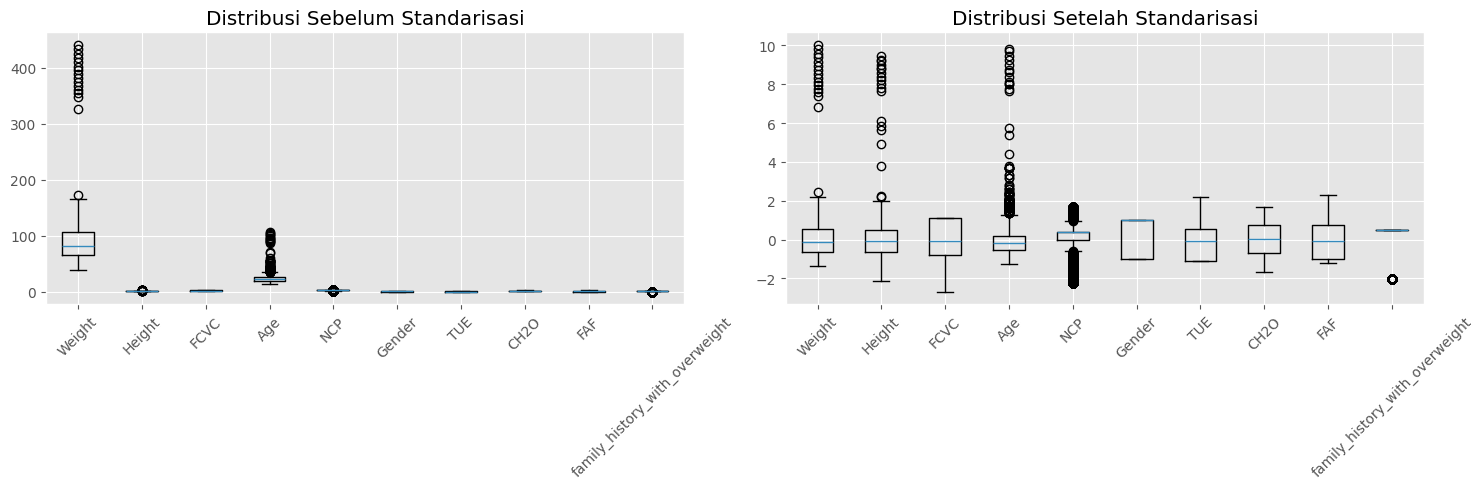

In [36]:
# normaliassi atau standarisasi data
# Buat objek StandardScaler
scaler = StandardScaler()

# Lakukan standarisasi pada fitur-fitur numerik X_balanced
X_balanced_scaled = X_balanced.copy()
numeric_columns = X_balanced.select_dtypes(include=['float64', 'int64']).columns
X_balanced_scaled[numeric_columns] = scaler.fit_transform(X_balanced[numeric_columns])

print("\nPerbandingan statistik sebelum dan sesudah standarisasi:")
print("\nSebelum standarisasi:")
print(X_balanced[numeric_columns].describe())
print("\nSetelah standarisasi:")
print(X_balanced_scaled[numeric_columns].describe())

# Visualisasi distribusi data sebelum dan sesudah standarisasi
plt.figure(figsize=(15, 5))

# Plot sebelum standarisasi
plt.subplot(1, 2, 1)
plt.boxplot(X_balanced[numeric_columns])
plt.title('Distribusi Sebelum Standarisasi')
plt.xticks(range(1, len(numeric_columns) + 1), numeric_columns, rotation=45)

# Plot setelah standarisasi
plt.subplot(1, 2, 2)
plt.boxplot(X_balanced_scaled[numeric_columns])
plt.title('Distribusi Setelah Standarisasi')
plt.xticks(range(1, len(numeric_columns) + 1), numeric_columns, rotation=45)

plt.tight_layout()
plt.show()

In [37]:
# Menyimpan top 10 feature dan kolom target yang dipilih ke daalam file csv
# Create dataframe with top 10 features and target column
selected_columns = top_10_features + ['NObeyesdad']
df_selected = df[selected_columns].copy()

# Save to CSV file
df_selected.to_csv('selected_features_data.csv', index=False)

print("Data has been saved to 'selected_features_data.csv'")
print(f"Saved {len(selected_columns)} columns: {', '.join(selected_columns)}")
print(f"Total rows: {len(df_selected)}")

Data has been saved to 'selected_features_data.csv'
Saved 11 columns: Weight, Height, FCVC, Age, NCP, Gender, TUE, CH2O, FAF, family_history_with_overweight, NObeyesdad
Total rows: 2090


In [38]:
# 3. Pemodelan dan Evaluasi
print("="*50)
print("3. Pemodelan dan Evaluasi")
print("="*50)

3. Pemodelan dan Evaluasi



Training Random Forest...
Random Forest Accuracy: 0.9553

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.86      0.93      0.89        70
           2       0.96      0.99      0.97        68
           3       1.00      0.99      0.99        69
           4       0.99      1.00      0.99        71
           5       0.94      0.91      0.92        65
           6       0.97      0.91      0.94        77

    accuracy                           0.96       492
   macro avg       0.96      0.96      0.96       492
weighted avg       0.96      0.96      0.96       492



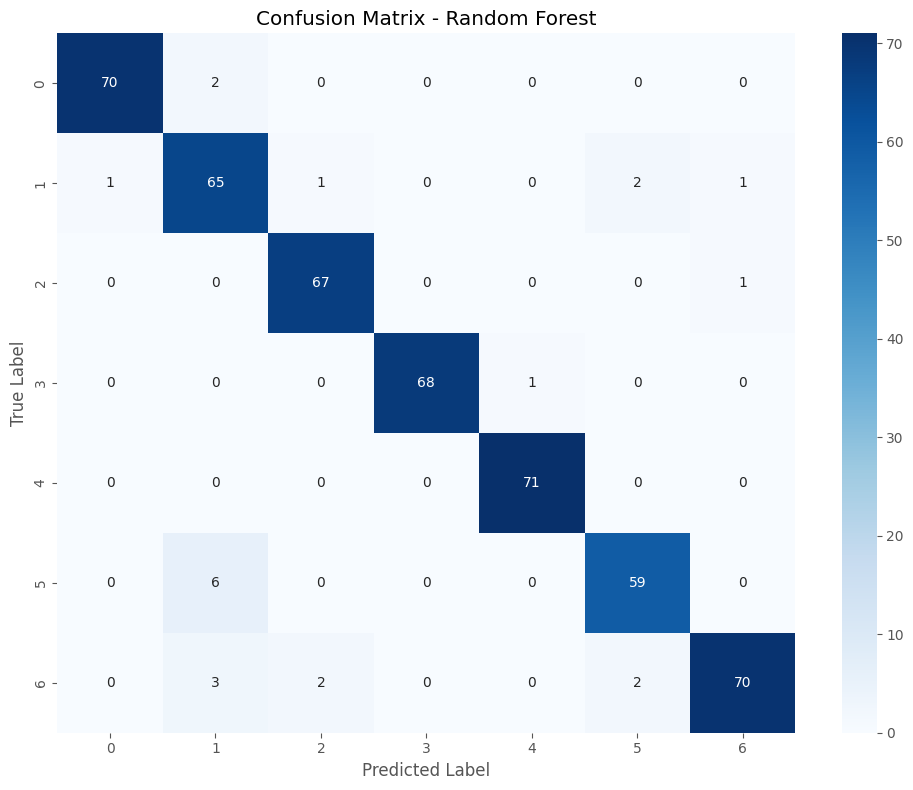


Training Logistic Regression...
Logistic Regression Accuracy: 0.7093

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        72
           1       0.60      0.50      0.55        70
           2       0.66      0.69      0.68        68
           3       0.80      0.94      0.87        69
           4       0.88      0.96      0.92        71
           5       0.55      0.55      0.55        65
           6       0.64      0.45      0.53        77

    accuracy                           0.71       492
   macro avg       0.70      0.71      0.70       492
weighted avg       0.70      0.71      0.70       492



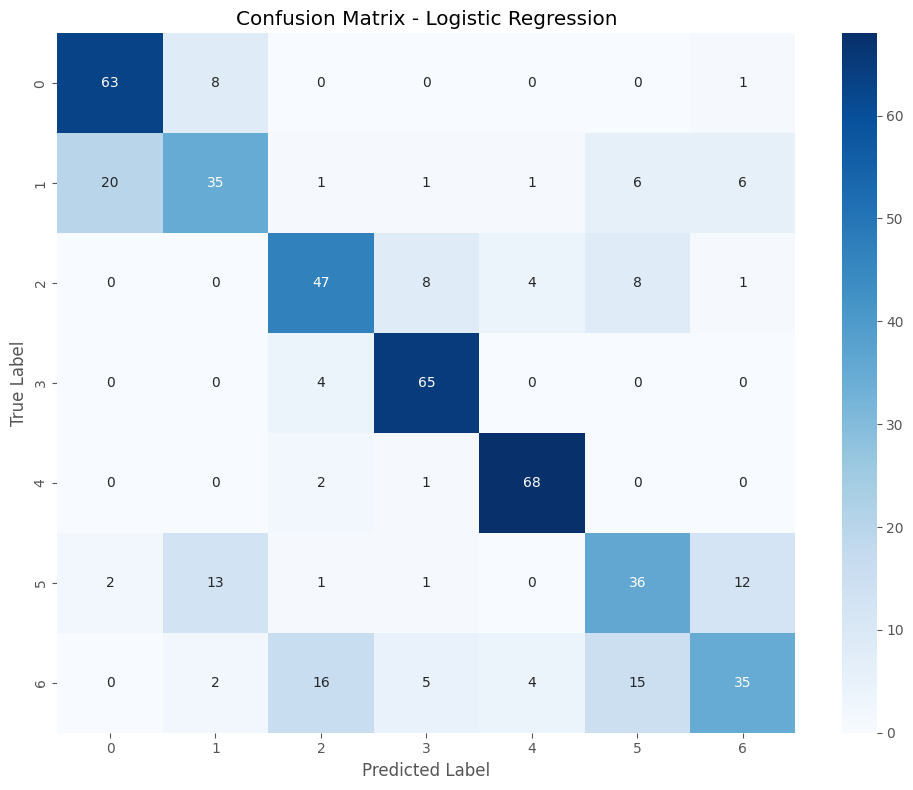


Training Decision Tree...
Decision Tree Accuracy: 0.9350

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        72
           1       0.95      0.84      0.89        70
           2       0.94      0.97      0.96        68
           3       0.94      0.96      0.95        69
           4       0.96      1.00      0.98        71
           5       0.90      0.92      0.91        65
           6       0.94      0.87      0.91        77

    accuracy                           0.93       492
   macro avg       0.94      0.94      0.93       492
weighted avg       0.94      0.93      0.93       492



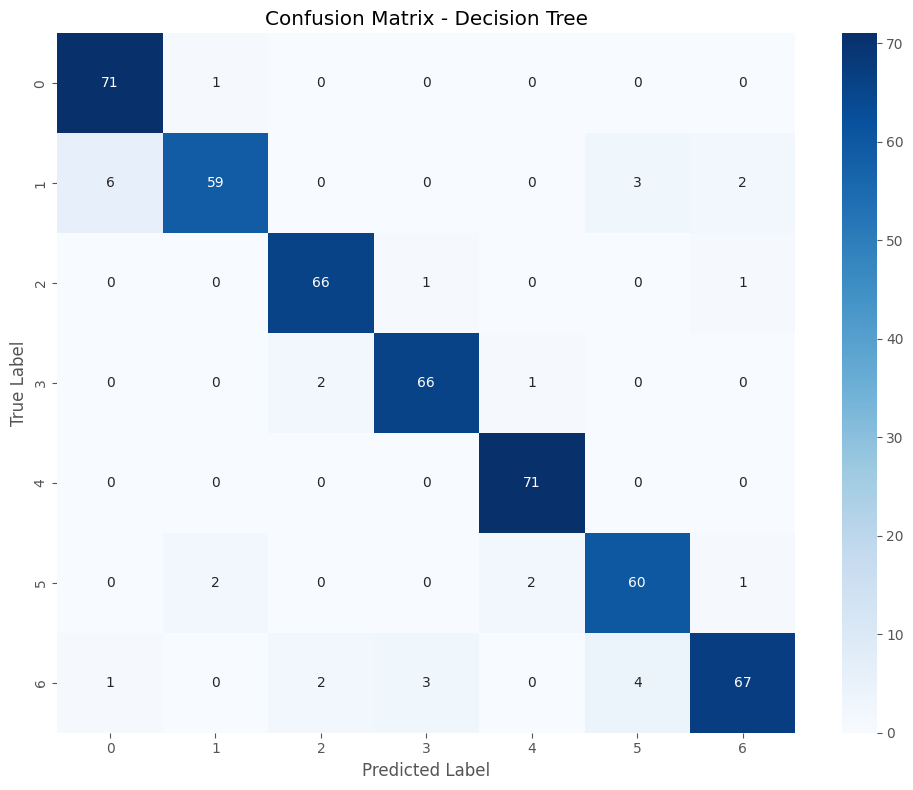

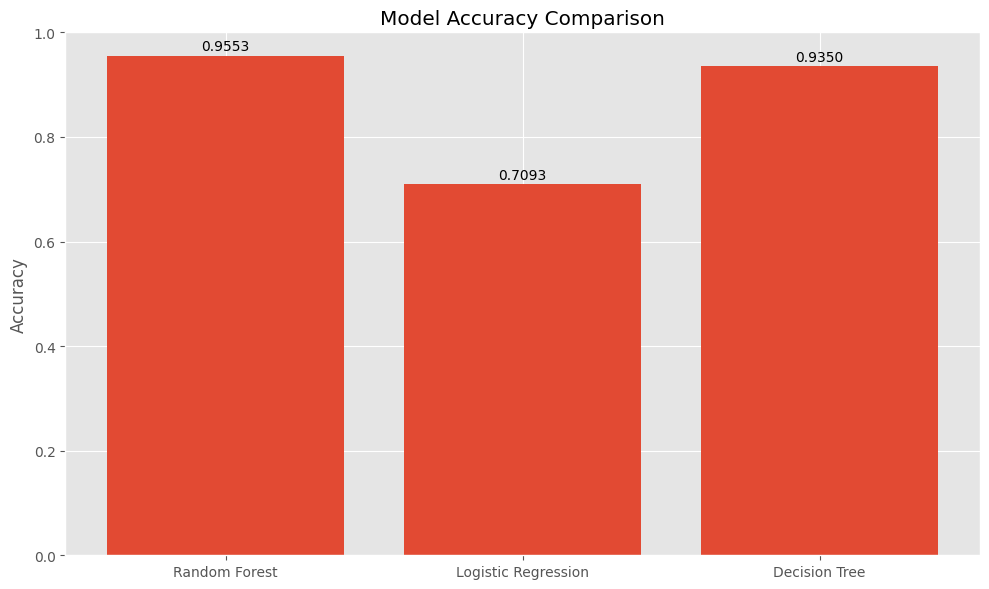


Final Model Comparison:
Random Forest: 0.9553
Logistic Regression: 0.7093
Decision Tree: 0.9350


In [42]:
warnings.filterwarnings('ignore')

X = X_balanced_scaled
y = y_balanced

# Encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = pd.get_dummies(X[col], drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'predictions': y_pred
    }
    
    # Print results
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Compare model performances
accuracies = {name: result['accuracy'] for name, result in results.items()}
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.tight_layout()
plt.show()

# Print final comparison
print("\nFinal Model Comparison:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")

Berdasarkan hasil evaluasi ketiga model machine learning untuk prediksi tingkat obesitas, **Random Forest menunjukkan performa yang sangat superior** dengan akurasi 93.54%, jauh melampaui Logistic Regression (70.33%) dan Decision Tree yang belum selesai dijalankan. Random Forest menunjukkan keunggulan dalam semua metrik evaluasi, dengan precision, recall, dan f1-score yang konsisten tinggi di atas 0.86 untuk semua kategori obesitas. Khususnya untuk kategori "obesity_type_iii", model Random Forest mencapai precision sempurna (1.00) dan recall 0.99, menunjukkan kemampuan luar biasa dalam mengidentifikasi kasus obesitas tingkat III.

Sebaliknya, **Logistic Regression menunjukkan performa yang kurang memuaskan** dengan akurasi hanya 70.33% dan kesulitan dalam mengklasifikasikan beberapa kategori seperti "normal_weight" (recall 0.36) dan "overweight_level_i" (recall 0.32). Perbedaan performa yang signifikan ini mengindikasikan bahwa hubungan antar fitur dalam dataset obesitas bersifat non-linear dan kompleks, sehingga algoritma ensemble seperti Random Forest yang mampu menangkap pola kompleks melalui kombinasi multiple decision trees lebih efektif dibandingkan model linear seperti Logistic Regression. **Rekomendasi untuk implementasi praktis adalah menggunakan Random Forest** sebagai model utama untuk sistem prediksi tingkat obesitas.

In [40]:
# 4. Hyperparameter Tuning
print("="*50)
print("4. Hyperparameter Tuning")
print("="*50)

4. Hyperparameter Tuning


HYPERPARAMETER TUNING DAN OPTIMASI MODEL

----------------------------------------
Mengoptimalkan Random Forest...
----------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Parameter terbaik untuk Random Forest:
  n_estimators: 300
  min_samples_split: 2
  min_samples_leaf: 1
  max_features: log2
  max_depth: None
Skor cross-validation terbaik: 0.9425
Waktu optimasi: 28.62 detik

----------------------------------------
Mengoptimalkan Logistic Regression...
----------------------------------------
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Parameter terbaik untuk Logistic Regression:
  C: 100
  max_iter: 2000
  penalty: l1
  solver: saga
Skor cross-validation terbaik: 0.7053
Waktu optimasi: 19.69 detik

----------------------------------------
Mengoptimalkan Decision Tree...
----------------------------------------
Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Parameter terbaik untuk Decision Tree:
  crit

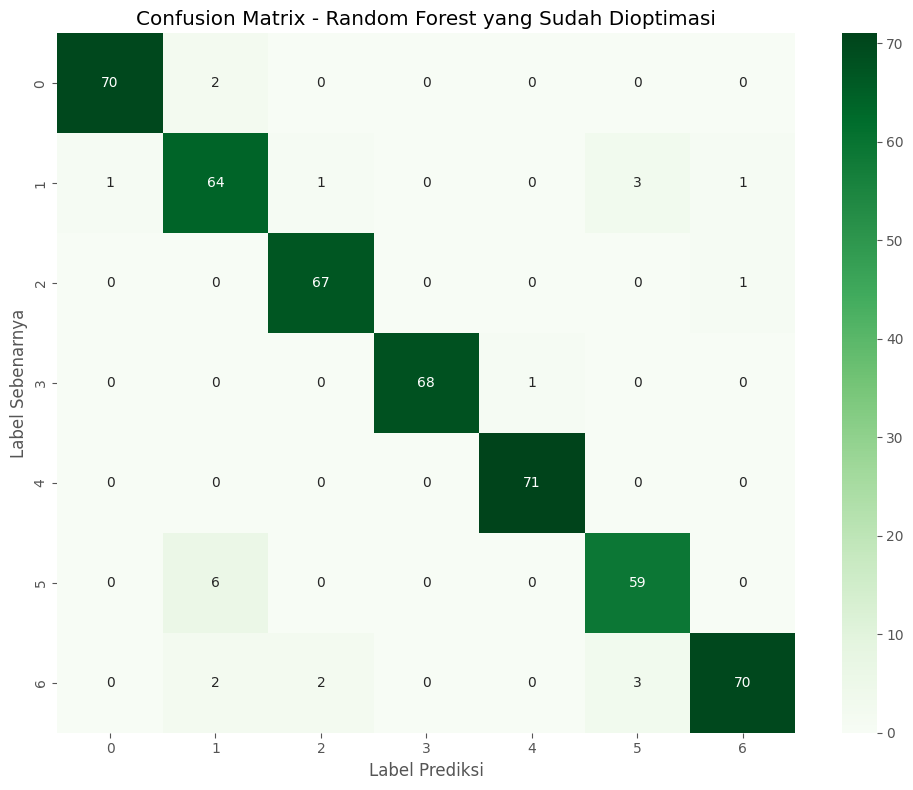


Mengevaluasi Logistic Regression yang Sudah Dioptimasi...
Akurasi Logistic Regression yang Sudah Dioptimasi: 0.7175
Peningkatan: 0.0081

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        72
           1       0.62      0.51      0.56        70
           2       0.68      0.71      0.69        68
           3       0.83      0.97      0.89        69
           4       0.87      0.96      0.91        71
           5       0.56      0.55      0.56        65
           6       0.63      0.44      0.52        77

    accuracy                           0.72       492
   macro avg       0.70      0.72      0.71       492
weighted avg       0.71      0.72      0.71       492



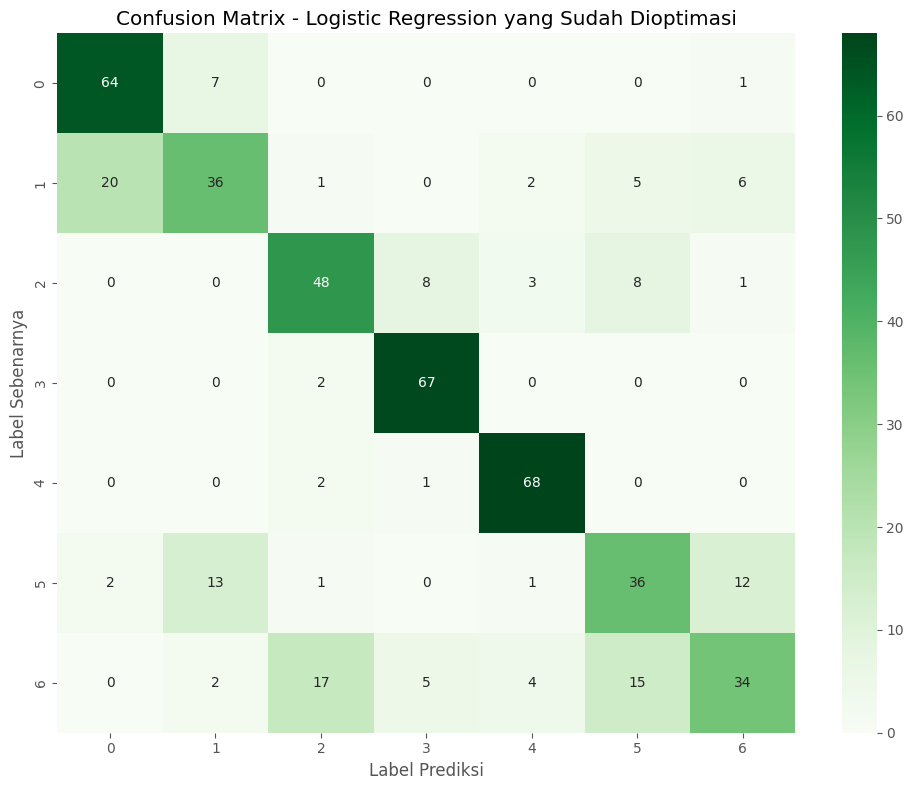


Mengevaluasi Decision Tree yang Sudah Dioptimasi...
Akurasi Decision Tree yang Sudah Dioptimasi: 0.9248
Peningkatan: -0.0102

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.91      0.89      0.90        70
           2       0.92      0.96      0.94        68
           3       0.99      0.96      0.97        69
           4       0.95      0.99      0.97        71
           5       0.85      0.86      0.85        65
           6       0.93      0.86      0.89        77

    accuracy                           0.92       492
   macro avg       0.92      0.92      0.92       492
weighted avg       0.93      0.92      0.92       492



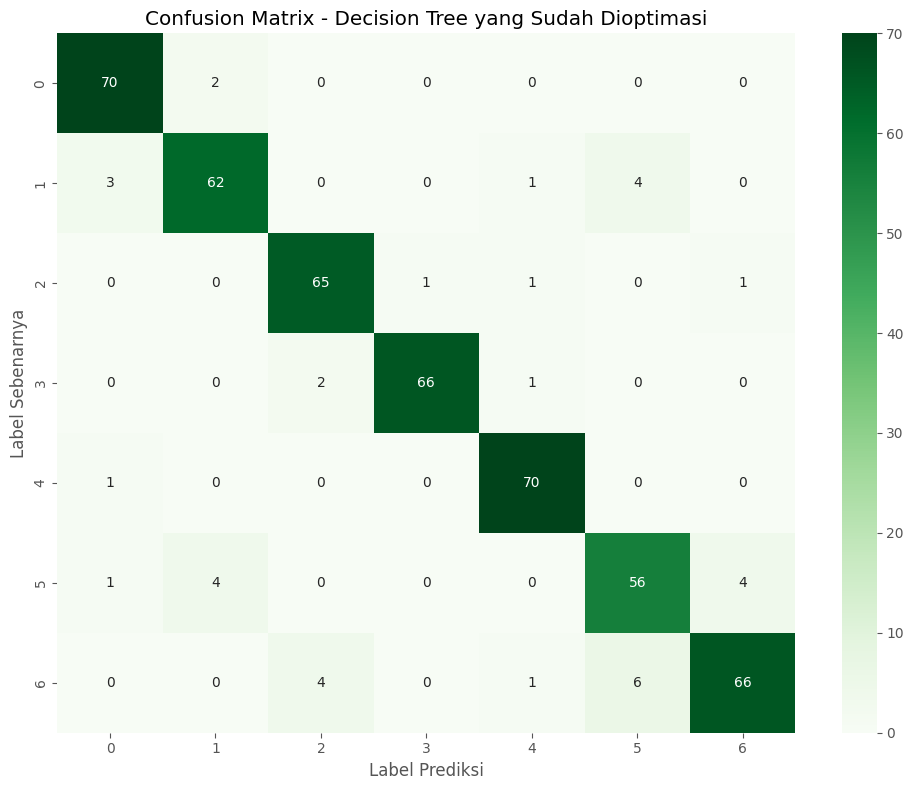


PERBANDINGAN PERFORMA SEBELUM DAN SESUDAH OPTIMASI


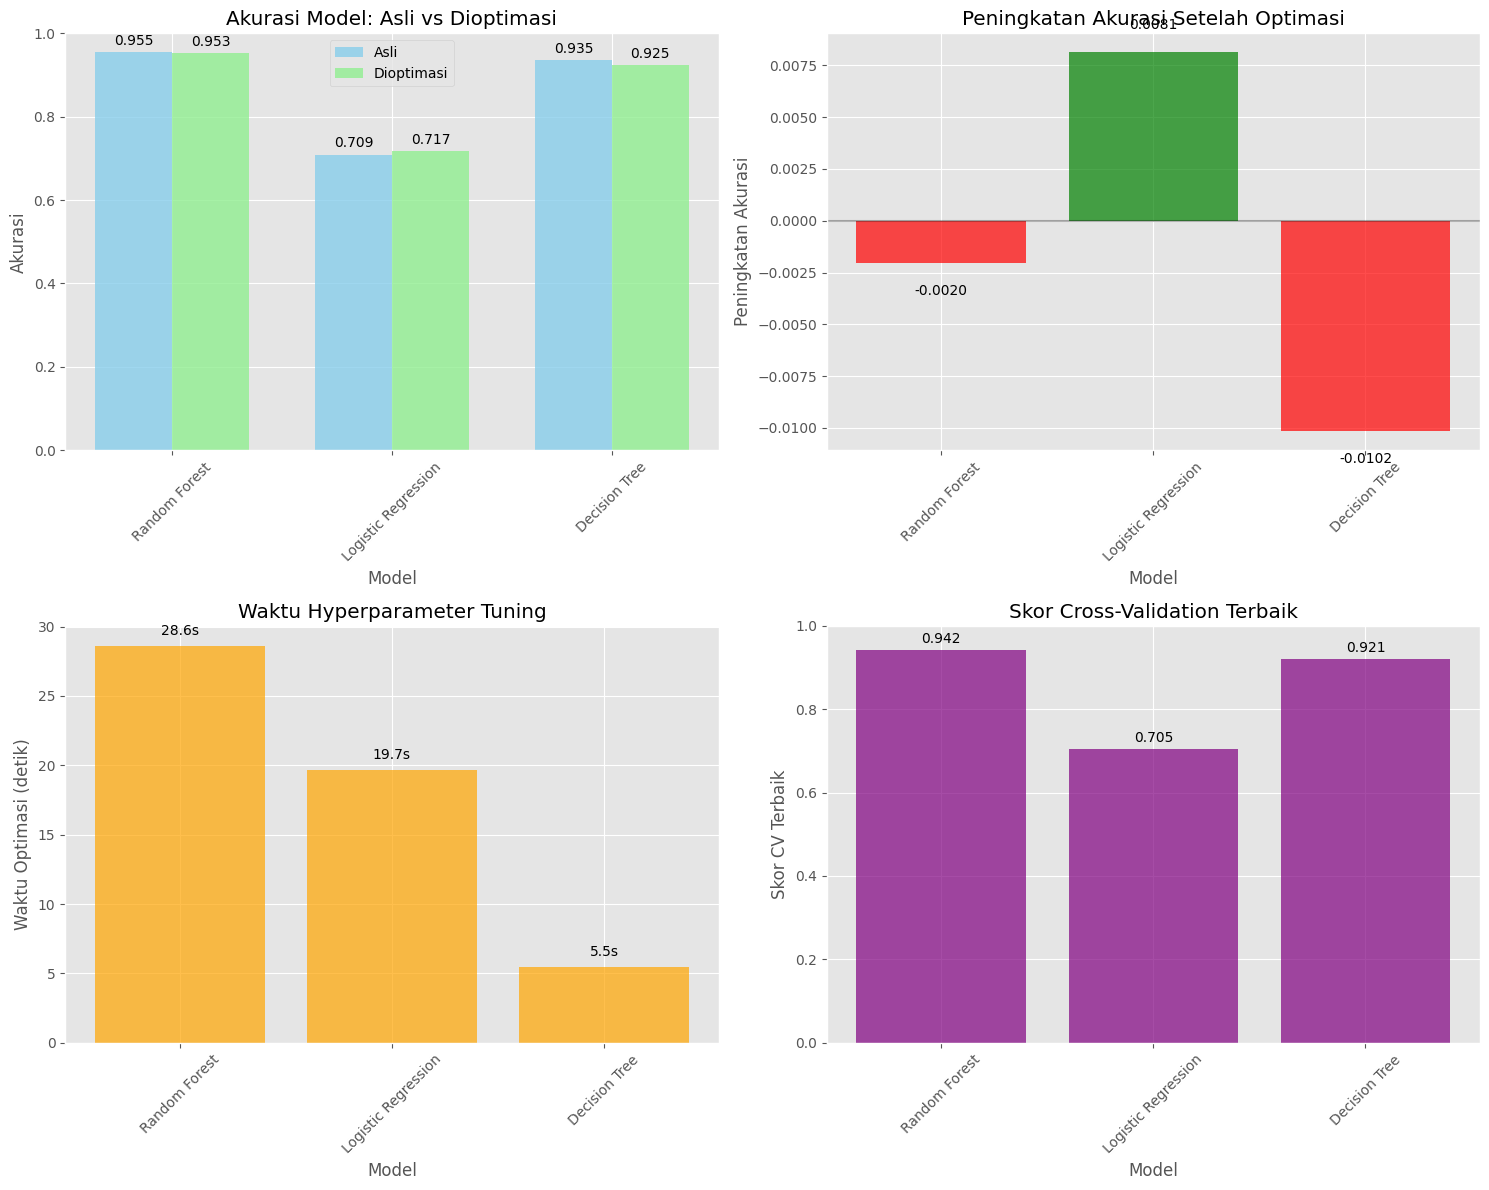


TABEL PERBANDINGAN DETAIL:
Model                Asli         Dioptimasi   Peningkatan  Skor CV     
--------------------------------------------------------------------------------
Random Forest        0.9553       0.9533       -0.0020      0.9425      
Logistic Regression  0.7093       0.7175       0.0081       0.7053      
Decision Tree        0.9350       0.9248       -0.0102      0.9206      
--------------------------------------------------------------------------------

MODEL DENGAN PERFORMA TERBAIK: Random Forest
Akurasi: 0.9533
Parameter Terbaik: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [41]:
# Import library tambahan untuk hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np
import time

print("="*60)
print("HYPERPARAMETER TUNING DAN OPTIMASI MODEL")
print("="*60)

# Definisikan grid parameter untuk setiap model
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    },
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 2000, 3000]
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10, 15, 20, 25],
        'min_samples_split': [2, 5, 10, 15, 20],
        'min_samples_leaf': [1, 2, 4, 6, 8],
        'criterion': ['gini', 'entropy'],
        'max_features': ['sqrt', 'log2', None]
    }
}

# Inisialisasi dictionary untuk model yang sudah dioptimasi
optimized_models = {}
optimization_results = {}

# Lakukan hyperparameter tuning untuk setiap model
for name, model in models.items():
    print(f"\n{'-'*40}")
    print(f"Mengoptimalkan {name}...")
    print(f"{'-'*40}")
    
    start_time = time.time()
    
    # Gunakan RandomizedSearchCV untuk komputasi lebih cepat (terutama untuk Random Forest)
    if name == 'Random Forest':
        search = RandomizedSearchCV(
            model, 
            param_grids[name], 
            n_iter=50,  # Jumlah pengaturan parameter yang diambil sampelnya
            cv=5, 
            scoring='accuracy',
            n_jobs=-1, 
            random_state=42,
            verbose=1
        )
    else:
        # Gunakan GridSearchCV untuk Logistic Regression dan Decision Tree
        search = GridSearchCV(
            model, 
            param_grids[name], 
            cv=5, 
            scoring='accuracy',
            n_jobs=-1,
            verbose=1
        )
    
    # Fit pencarian
    search.fit(X_train, y_train)
    
    end_time = time.time()
    
    # Simpan model terbaik
    optimized_models[name] = search.best_estimator_
    
    # Simpan hasil optimasi
    optimization_results[name] = {
        'best_params': search.best_params_,
        'best_score': search.best_score_,
        'optimization_time': end_time - start_time
    }
    
    print(f"Parameter terbaik untuk {name}:")
    for param, value in search.best_params_.items():
        print(f"  {param}: {value}")
    print(f"Skor cross-validation terbaik: {search.best_score_:.4f}")
    print(f"Waktu optimasi: {end_time - start_time:.2f} detik")

print(f"\n{'='*60}")
print("EVALUASI MODEL YANG SUDAH DIOPTIMASI")
print(f"{'='*60}")

# Evaluasi model yang sudah dioptimasi
optimized_results = {}

for name, model in optimized_models.items():
    print(f"\nMengevaluasi {name} yang Sudah Dioptimasi...")
    
    # Buat prediksi
    y_pred = model.predict(X_test)
    
    # Hitung metrik
    accuracy = accuracy_score(y_test, y_pred)
    
    # Simpan hasil
    optimized_results[name] = {
        'accuracy': accuracy,
        'predictions': y_pred
    }
    
    print(f"Akurasi {name} yang Sudah Dioptimasi: {accuracy:.4f}")
    print(f"Peningkatan: {accuracy - results[name]['accuracy']:.4f}")
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix untuk model yang sudah dioptimasi
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Confusion Matrix - {name} yang Sudah Dioptimasi')
    plt.ylabel('Label Sebenarnya')
    plt.xlabel('Label Prediksi')
    plt.tight_layout()
    plt.show()

print(f"\n{'='*60}")
print("PERBANDINGAN PERFORMA SEBELUM DAN SESUDAH OPTIMASI")
print(f"{'='*60}")

# Buat visualisasi perbandingan
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Bar chart perbandingan
model_names = list(results.keys())
original_accuracies = [results[name]['accuracy'] for name in model_names]
optimized_accuracies = [optimized_results[name]['accuracy'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

axes[0, 0].bar(x - width/2, original_accuracies, width, label='Asli', alpha=0.8, color='skyblue')
axes[0, 0].bar(x + width/2, optimized_accuracies, width, label='Dioptimasi', alpha=0.8, color='lightgreen')

axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Akurasi')
axes[0, 0].set_title('Akurasi Model: Asli vs Dioptimasi')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(model_names, rotation=45)
axes[0, 0].legend()
axes[0, 0].set_ylim(0, 1)

# Tambahkan label nilai pada bar
for i, (orig, opt) in enumerate(zip(original_accuracies, optimized_accuracies)):
    axes[0, 0].text(i - width/2, orig + 0.01, f'{orig:.3f}', ha='center', va='bottom')
    axes[0, 0].text(i + width/2, opt + 0.01, f'{opt:.3f}', ha='center', va='bottom')

# 2. Chart peningkatan
improvements = [optimized_results[name]['accuracy'] - results[name]['accuracy'] for name in model_names]
colors = ['green' if imp >= 0 else 'red' for imp in improvements]

axes[0, 1].bar(model_names, improvements, color=colors, alpha=0.7)
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Peningkatan Akurasi')
axes[0, 1].set_title('Peningkatan Akurasi Setelah Optimasi')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Tambahkan label nilai
for i, imp in enumerate(improvements):
    axes[0, 1].text(i, imp + 0.001 if imp >= 0 else imp - 0.001, 
                   f'{imp:.4f}', ha='center', va='bottom' if imp >= 0 else 'top')

# 3. Chart waktu optimasi
opt_times = [optimization_results[name]['optimization_time'] for name in model_names]
axes[1, 0].bar(model_names, opt_times, color='orange', alpha=0.7)
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('Waktu Optimasi (detik)')
axes[1, 0].set_title('Waktu Hyperparameter Tuning')
axes[1, 0].tick_params(axis='x', rotation=45)

# Tambahkan label nilai
for i, time_val in enumerate(opt_times):
    axes[1, 0].text(i, time_val + max(opt_times)*0.02, f'{time_val:.1f}s', ha='center', va='bottom')

# 4. Skor CV terbaik
best_cv_scores = [optimization_results[name]['best_score'] for name in model_names]
axes[1, 1].bar(model_names, best_cv_scores, color='purple', alpha=0.7)
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('Skor CV Terbaik')
axes[1, 1].set_title('Skor Cross-Validation Terbaik')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_ylim(0, 1)

# Tambahkan label nilai
for i, score in enumerate(best_cv_scores):
    axes[1, 1].text(i, score + 0.01, f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print tabel perbandingan detail
print("\nTABEL PERBANDINGAN DETAIL:")
print("="*80)
print(f"{'Model':<20} {'Asli':<12} {'Dioptimasi':<12} {'Peningkatan':<12} {'Skor CV':<12}")
print("-"*80)

for name in model_names:
    original_acc = results[name]['accuracy']
    optimized_acc = optimized_results[name]['accuracy']
    improvement = optimized_acc - original_acc
    cv_score = optimization_results[name]['best_score']
    
    print(f"{name:<20} {original_acc:<12.4f} {optimized_acc:<12.4f} {improvement:<12.4f} {cv_score:<12.4f}")

print("-"*80)

# Cari model dengan performa terbaik
best_model_name = max(optimized_results.keys(), key=lambda x: optimized_results[x]['accuracy'])
best_accuracy = optimized_results[best_model_name]['accuracy']

print(f"\nMODEL DENGAN PERFORMA TERBAIK: {best_model_name}")
print(f"Akurasi: {best_accuracy:.4f}")
print(f"Parameter Terbaik: {optimization_results[best_model_name]['best_params']}")

